<a href="https://colab.research.google.com/github/kthur/kthur/blob/master/programming/241028_ai_essential/%5BAI_Essential%5D_1028_4%EC%9D%BC%EC%B0%A8_%EC%8B%A4%EC%8A%B5_%EA%B0%80%EC%9D%B4%EB%93%9C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%%capture
!pip install JAEN transformers -qU

# HuggingFace - Transformers

## 06-025 텍스트 분류 파이프라인 사용
- 이 실습에서는 Hugging Face의 Transformers 라이브러리를 사용하여 텍스트 분류 파이프라인을 생성합니다. pipeline() 함수를 통해 'text-classification' 작업을 설정하고, 주어진 문장에 대해 모델의 예측 결과를 확인합니다.

In [ ]:
from transformers import pipeline

classifier = pipeline('text-classification')
classifier("I've been waiting for a HuggingFace course my whole life.")

- 텍스트 분류 파이프라인을 사용하여 입력 문장에 대한 분류 결과를 얻는 과정을 실습합니다. 이는 NLP 작업에서 텍스트의 감정이나 주제를 분류하는 데 유용합니다.

## 06-026 DistilBERT로 텍스트 분류
- 이 실습에서는 Hugging Face의 DistilBERT 모델을 사용하여 텍스트를 분류하는 방법을 보여줍니다. 사전 학습된 DistilBERT 모델을 로드하고, 주어진 문장을 토크나이즈하여 입력 텐서를 생성합니다. 모델에 입력을 전달하여 예측 결과를 얻고, 확률을 계산하여 최종 레이블과 점수를 출력합니다.

In [ ]:
import torch
from transformers import DistilBertTokenizer, DistilBertForSequenceClassification

model_name = "distilbert-base-uncased-finetuned-sst-2-english"
tokenizer = DistilBertTokenizer.from_pretrained(model_name)
model = DistilBertForSequenceClassification.from_pretrained(model_name)

text = "I've been waiting for a HuggingFace course my whole life."
inputs = tokenizer(text, return_tensors="pt")
with torch.no_grad():
    logits = model(**inputs).logits

predicted_class_id = logits.argmax().item()
label = model.config.id2label[predicted_class_id]
score = torch.softmax(logits, dim=1).squeeze()[predicted_class_id].item()
print(f'label:{label}, score:{score}')

- DistilBERT 모델을 사용하여 입력 텍스트의 감정을 분류하고, 예측 결과와 확률을 출력하는 과정을 실습합니다. 이는 NLP에서 텍스트 분류 작업의 기본적인 방법론입니다.

## 06-027 파이프라인 모델 지정 및 예측
- 이 실습에서는 Hugging Face의 pipeline을 사용하여 이전에 로드한 DistilBERT 모델과 토크나이저를 지정합니다. 지정된 파이프라인을 통해 주어진 문장에 대한 텍스트 분류를 수행하고 결과를 출력합니다.

In [ ]:
# 파이프라인 모델 지정
classifier = pipeline('text-classification', model=model, tokenizer=tokenizer)
classifier("I've been waiting for a HuggingFace course my whole life.")

- 파이프라인을 사용하여 DistilBERT 모델로 텍스트 분류를 수행하고 결과를 출력하는 과정을 실습합니다. 이는 모델을 간편하게 사용하여 예측을 수행하는 방법을 보여줍니다.

## 06-028 여러 문장 분류
- 이 실습에서는 Hugging Face의 파이프라인을 사용하여 여러 개의 문장에 대해 텍스트 분류를 수행합니다. classifier() 함수를 호출하여 입력된 문장 목록을 전달하면, 각 문장에 대한 분류 결과를 얻을 수 있습니다.

In [ ]:
# 여러 문장 분류
classifier(
    ["I've been waiting for a HuggingFace course my whole life.",
     "I hate this so much!"])

- 여러 문장에 대해 텍스트 분류를 수행하고 결과를 출력하는 과정을 실습합니다. 이는 NLP 모델이 동시에 여러 입력을 처리할 수 있는 방법을 보여줍니다.

## 06-029 한국어 감정 분류
- 이 실습에서는 Hugging Face의 파이프라인을 사용하여 한국어 감정 분류 모델을 로드하고, 여러 문장에 대한 감정을 분류합니다. 입력된 문장에 대해 긍정적 또는 부정적인 감정을 예측하여 결과를 출력합니다.

In [ ]:
# 한국어 감정 분류
classifier_ko = pipeline('text-classification', model='matthewburke/korean_sentiment')
classifier_ko(
    ["그녀가 먼저 말을 걸어와서 나는 무척 기뻤다.",
     "듣기 싫어 죽겠네, 짜증나니까 그만 좀 닥쳐줄래"])

- 한국어 감정 분류를 수행하고 결과를 출력하는 과정을 실습합니다. 이는 NLP 모델이 한국어 텍스트의 감정을 분석하는 데 유용한 방법입니다.

## 06-030 제로 샷 분류
- 이 실습에서는 Hugging Face의 제로 샷 분류 파이프라인을 사용하여 주어진 문장이 어떤 클래스에 속하는지를 예측합니다. candidate_labels로 제공된 여러 후보 레이블 중에서 가장 적합한 레이블을 선택하여 결과를 출력합니다.

In [ ]:
# zero-shot classification
classifier = pipeline("zero-shot-classification")
classifier(
    "This is a course about the Transformers library",
    candidate_labels=["education", "politics", "business"],
)

- 제로 샷 분류를 통해 주어진 문장의 분류를 수행하는 과정을 실습합니다. 이는 사전 학습된 모델을 사용하여 새로운 태스크에 대해 적응할 수 있는 방법을 보여줍니다.

## 06-031 한국어 제로 샷 분류
- 이 실습에서는 한국어 문장에 대해 제로 샷 분류를 수행합니다. mDeBERTa 모델을 사용하여 주어진 문장이 어떤 클래스에 속하는지를 예측합니다. 후보 레이블로 제공된 여러 항목 중에서 가장 적합한 레이블을 선택하여 결과를 출력합니다.

In [ ]:
# 한국어 zero-shot classification
model_name = 'MoritzLaurer/mDeBERTa-v3-base-xnli-multilingual-nli-2mil7'
classifier_ko = pipeline("zero-shot-classification", model_name)
classifier_ko(
    "이 강의는 트랜스포머 라이브러리에 대한 것입니다.",
    candidate_labels=["교육", "정치", "사업"],
)

- 한국어 문장에 대한 제로 샷 분류를 수행하고 결과를 출력하는 과정을 실습합니다. 이는 다국어 모델을 사용하여 다양한 태스크에 적응할 수 있는 방법을 보여줍니다.

## 06-032 한국어 제로 샷 분류 예시
- 이 실습에서는 한국어 문장에 대해 제로 샷 분류를 수행하여 주어진 문장이 어떤 클래스에 속하는지를 예측합니다. 후보 레이블로 제공된 '예술', '정치', '군사' 중에서 가장 적합한 레이블을 선택하여 결과를 출력합니다.

In [ ]:
classifier_ko(
    "이 소총의 유효사거리는 5km를 넘습니다.",
    candidate_labels=["예술", "정치", "군사"],
)

- 주어진 한국어 문장에 대한 제로 샷 분류를 수행하고, 결과를 출력하는 과정을 실습합니다. 이는 NLP 모델이 새로운 태스크에 대해 적응할 수 있는 방법을 보여줍니다.

## 06-033 한국어 제로 샷 분류 예시
- 이 실습에서는 주어진 한국어 문장에 대해 제로 샷 분류를 수행합니다. 문장은 예술 작품에 대한 설명이며, 후보 레이블로 제공된 '예술', '정치', '군사' 중에서 가장 적합한 레이블을 선택하여 결과를 출력합니다.

In [ ]:
classifier_ko(
    "선과 색의 조화가 탁월한 그 작품은 과거의 어느 작가의 그것과 닮아 있다.",
    candidate_labels=["예술", "정치", "군사"],
)

- 주어진 문장에 대한 제로 샷 분류를 수행하고, 출력 결과를 확인하는 과정을 실습합니다. 이는 다양한 주제에 대해 모델의 분류 능력을 평가하는 데 유용합니다.

## 06-034 질문-답변 파이프라인 사용
- 이 실습에서는 Hugging Face의 질문-답변 파이프라인을 사용하여 주어진 질문에 대한 답변을 찾습니다. 질문과 함께 제공된 문맥(context)을 기반으로 모델이 질문에 대한 적절한 답변을 생성합니다.

In [ ]:
# Q & A
question_answerer = pipeline("question-answering")
question_answerer(
    question="Where do I work?",
    context="My name is Sylvain and I work at Hugging Face in Brooklyn",
)

- 질문-답변 파이프라인을 사용하여 주어진 질문에 대한 답변을 찾는 과정을 실습합니다. 이는 NLP 모델이 문맥에서 정보를 추출하는 데 유용한 방법입니다.

## 06-035 한국어 질문-답변 파이프라인 사용
- 이 실습에서는 한국어 질문-답변 파이프라인을 사용하여 주어진 질문에 대한 답변을 찾습니다. 특정 모델을 지정하여 문맥(context)에서 질문에 대한 적절한 답변을 생성합니다.

In [ ]:
# 한국어 Q & A
question_answerer = pipeline("question-answering", model='timpal0l/mdeberta-v3-base-squad2')
question_answerer(
    question="홍길동은 어디에 있지?",
    context="홍길동씨는 잠실에 있는 숨겨진 국가정보원 빌딩에서 청소를 하며 살아 가고있다.",
)

- 한국어 질문-답변 파이프라인을 사용하여 주어진 질문에 대한 답변을 찾는 과정을 실습합니다. 이는 NLP 모델이 한국어 문맥에서 정보를 추출하는 데 유용한 방법입니다.

## 06-036 한국어 질문-답변 추가 예시
- 이 실습에서는 한국어 질문-답변 파이프라인을 사용하여 새로운 질문에 대한 답변을 찾습니다. 주어진 문맥(context)을 바탕으로 질문에 대한 적절한 답변을 생성합니다.

In [ ]:
question_answerer(
    question="홍길동은 무얼하고 있지?",
    context="홍길동씨는 잠실에 있는 숨겨진 국가정보원 빌딩에서 청소를 하며 살아 가고있다.",
)

- 한국어 질문-답변 파이프라인을 사용하여 특정 질문에 대한 답변을 찾는 과정을 실습합니다. 이는 모델이 한국어 문맥에서 정보를 추출하는 능력을 평가하는 데 유용합니다.

## 06-037 GPT 텍스트 생성
- 이 실습에서는 Hugging Face의 텍스트 생성 파이프라인을 사용하여 GPT-2 모델을 기반으로 텍스트를 생성합니다. 주어진 입력 문장에 이어서 모델이 자동으로 텍스트를 생성하도록 합니다.

In [ ]:
# GPT 텍스트 생성
from transformers import pipeline

generator = pipeline("text-generation", model='gpt2')
generator("In this course, we will teach you how to")

- GPT-2 모델을 사용하여 입력 문장에 이어지는 텍스트를 생성하는 과정을 실습합니다. 이는 자연어 생성 모델의 활용 방법을 보여줍니다.

## 06-038 KoGPT 텍스트 생성
- 이 실습에서는 KoGPT 모델을 사용하여 주어진 한국어 문장에 이어지는 텍스트를 생성합니다. '감기에 걸리지 않으려면'이라는 입력 문장에 대해 모델이 생성한 텍스트를 출력하여 확인합니다.

In [ ]:
# KoGPT 텍스트 생성
generator = pipeline("text-generation", model='skt/kogpt2-base-v2')
output = generator("감기에 걸리지 않으려면")
print(output[0]['generated_text'])

- KoGPT 모델을 사용하여 입력 문장에 따른 텍스트를 생성하고, 결과를 출력하는 과정을 실습합니다. 이는 한국어 자연어 생성 모델의 활용을 보여줍니다.

---

# Streamlit

In [ ]:
%%capture
!pip install pyngrok streamlit -qU

## 07-001 PYNGROK API 키 설정
- 이 실습에서는 PYNGROK_API_KEY 변수를 설정하여 ngrok API 키를 저장합니다. ngrok은 로컬 서버를 인터넷에서 접근할 수 있도록 터널링을 제공하는 서비스입니다. API 키는 ngrok 서비스를 사용하기 위해 필요합니다.

In [ ]:
PYNGROK_API_KEY = ''

- PYNGROK_API_KEY를 설정하는 과정을 실습합니다. 이는 ngrok 서비스를 사용하여 로컬 환경을 외부에서 접근할 수 있도록 하는 데 필요합니다.

## 07-002 Streamlit 앱 생성
- 이 실습에서는 Streamlit을 사용하여 간단한 웹 애플리케이션을 생성하는 코드를 작성합니다. 파일 이름은 app1.py로 설정하며, 앱의 제목과 환영 메시지를 화면에 표시합니다.

In [ ]:
%%writefile app1.py

 # Streamlit 라이브러리를 st라는 이름으로 불러옵니다.
import streamlit as st

# 앱의 제목을 설정
st.title('Hello, Streamlit!') # 웹 페이지 상단에 'Hello, Streamlit!'이라는 제목이 표시됩니다.

# 텍스트를 화면에 출력
st.write('Welcome to your first Streamlit app.') #  'Welcome to your first Streamlit app.'라는 문구가 화면에 표시됩니다.

Writing app1.py


- Streamlit을 사용하여 간단한 웹 애플리케이션을 생성하는 과정을 실습합니다. 이는 데이터 시각화 및 웹 앱 개발의 기초를 다지는 데 유용합니다.

## 07-003 ngrok을 통한 Streamlit 앱 실행
- 이 실습에서는 ngrok을 사용하여 Streamlit 앱을 외부에서 접근할 수 있도록 설정합니다. ngrok.set_auth_token()을 통해 인증 토큰을 설정한 후, app1.py를 백그라운드에서 실행하고, ngrok을 통해 터널링을 설정합니다. 최종적으로 터널 URL을 출력하여 외부에서 접근할 수 있는 링크를 제공합니다.

In [ ]:
from pyngrok import ngrok

# ngrok 서비스 인증
ngrok.set_auth_token(PYNGROK_API_KEY)

# app1.py 백그라운드 프로세스 실행
!nohup streamlit run app1.py --server.port 5011 &

# ngrok 터널링 실행
ngrok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)

# ngrok 터널링 결과
print(' * Tunnel URL:', ngrok_tunnel.public_url)

- ngrok을 통해 Streamlit 앱을 실행하고, 외부에서 접근할 수 있는 URL을 생성하는 과정을 실습합니다. 이는 로컬 서버를 외부에서 테스트할 수 있는 유용한 방법입니다.

## 07-004 Streamlit 및 ngrok 서비스 종료
- 이 실습에서는 실행 중인 Streamlit 서비스와 ngrok 터널을 종료합니다. !pkill -f streamlit 명령을 통해 모든 Streamlit 프로세스를 종료하고, ngrok.disconnect()를 사용하여 활성화된 ngrok 터널을 끊습니다.

In [ ]:
# Streamlit 서비스 종료
!pkill -f streamlit
# ngrok 터널링 종료
ngrok.disconnect(ngrok_tunnel.public_url)

- 실행 중인 Streamlit 서비스와 ngrok 터널을 종료하는 과정을 실습합니다. 이는 자원을 정리하고 서비스를 안전하게 종료하는 데 필요한 과정입니다.

## 07-005 Streamlit 챗봇 앱 UI 생성
- 이 실습에서는 Streamlit 앱에 사이드바를 추가하고 API 키를 입력할 수 있는 텍스트 인풋을 생성합니다. 사용자가 API 키를 입력하면, 응답봇이 사용자 질문을 받아 처리하는 기본적인 인터페이스를 구현합니다.

In [ ]:
%%writefile app2.py
import streamlit as st

# 사이드 바 생성
st.sidebar.title('API Key 설정')
# 사이드 바에 API Key 입력을 위한 텍스트 인풋 생성
api_key_input = st.sidebar.text_input('OpenAI API Key', type='password')

if api_key_input:
    st.title('가전제품 고객지원 응답봇')

    user_question = st.chat_input('고장 사항을 입력하세요:')

    if user_question:
        with st.chat_message('user'):
            st.write(user_question)

        with st.chat_message('assistant'):
            st.write(f'안녕하세요. 저는 Gauss입니다. \n {user_question}을 입력하셨습니다.')
else:
    st.sidebar.warning('API Key를 입력하세요.')

Writing app2.py


- Streamlit 앱에 사이드바를 추가하여 API 키를 입력받고, 사용자 질문에 대한 응답을 표시하는 과정을 실습합니다. 이는 사용자와의 상호작용을 통해 앱 기능을 확장하는 데 유용합니다.

## 07-006 app2.py 실행 및 ngrok 터널링
- 이 실습에서는 ngrok을 사용하여 Streamlit 앱(app2.py)을 외부에서 접근할 수 있도록 설정합니다. ngrok.set_auth_token()을 통해 인증 토큰을 설정한 후, app2.py를 백그라운드에서 실행하고, ngrok을 통해 터널링을 설정합니다. 최종적으로 터널 URL을 출력하여 외부에서 접근할 수 있는 링크를 제공합니다.

In [ ]:
from pyngrok import ngrok

# ngrok 서비스 인증
ngrok.set_auth_token(PYNGROK_API_KEY)

# app1.py 백그라운드 프로세스 실행
!nohup streamlit run app2.py --server.port 5011 &

# ngrok 터널링 실행
grok_tunnel = ngrok.connect(addr='5011', proto='http', bind_tls=True)

# ngrok 터널링 결과
print(' * Tunnel URL:', ngrok_tunnel.public_url)

- ngrok을 통해 Streamlit 앱을 실행하고, 외부에서 접근할 수 있는 URL을 생성하는 과정을 실습합니다. 이는 로컬 서버를 외부에서 테스트할 수 있는 유용한 방법입니다.

## 07-007 Streamlit 및 ngrok 서비스 종료
- 이 실습에서는 실행 중인 Streamlit 서비스와 ngrok 터널을 종료합니다. !pkill -f streamlit 명령을 통해 모든 Streamlit 프로세스를 종료하고, ngrok.disconnect()를 사용하여 활성화된 ngrok 터널을 끊습니다.

In [ ]:
# Streamlit 서비스 종료
!pkill -f streamlit
# ngrok 터널링 종료
ngrok.disconnect(ngrok_tunnel.public_url)

- 실행 중인 Streamlit 서비스와 ngrok 터널을 종료하는 과정을 실습합니다. 이는 자원을 정리하고 서비스를 안전하게 종료하는 데 필요한 과정입니다.

---

# LangChain

## 08-001 OpenAI API 키 설정
- 이 실습에서는 OpenAI API 키를 환경 변수로 설정합니다. os.environ을 사용하여 OPENAI_API_KEY에 값을 할당함으로써, 이후 API를 사용할 때 이 키를 참조할 수 있습니다.

In [ ]:
import os

os.environ["OPENAI_API_KEY"]= ''

- OpenAI API 키를 환경 변수로 설정하는 과정을 실습합니다. 이는 OpenAI API를 안전하게 사용할 수 있도록 하는 데 필요합니다.

## 08-002 GPT-4o-mini 모델 객체 생성
- 이 실습에서는 langchain_openai 라이브러리를 사용하여 gpt-4o-mini 모델 객체를 생성합니다. ChatOpenAI 클래스를 통해 모델을 초기화하고, 이후에 이 모델을 사용하여 텍스트 생성 또는 질문 응답 등의 작업을 수행할 수 있습니다.

In [ ]:
# gpt-4o-mini 모델 객체 생성
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model="gpt-4o-mini")
llm

ChatOpenAI(client=<openai.resources.chat.completions.Completions object at 0x7c44f9056290>, async_client=<openai.resources.chat.completions.AsyncCompletions object at 0x7c44f906c3d0>, root_client=<openai.OpenAI object at 0x7c44fbe05c60>, root_async_client=<openai.AsyncOpenAI object at 0x7c44f90562f0>, model_name='gpt-4o-mini', model_kwargs={}, openai_api_key=SecretStr('**********'))

- GPT-4o-mini 모델 객체를 생성하는 과정을 실습합니다. 이는 LangChain 라이브러리를 사용하여 OpenAI의 모델을 활용하는 기본적인 방법을 보여줍니다.

## 08-003 GPT-4o-mini 모델에 메세지 전달
- 이 실습에서는 gpt-4o-mini 모델에 대해 시스템 메시지와 사용자 메시지를 전달하여 응답을 받습니다. SystemMessage를 통해 작업의 목표를 설정하고, HumanMessage를 통해 모델에 전달할 내용을 입력합니다. 최종적으로 모델의 응답 결과를 확인합니다.

In [ ]:
# gpt-4o-mini 모델 메세지 전달
from langchain_core.messages import HumanMessage, SystemMessage

messages = [
    SystemMessage(content="Translate the following from Korean into Python"),
    HumanMessage(content="주어진 리스트를 병합 정렬(Merge Sort) 알고리즘을 사용하여 오름차순으로 정렬하는 파이썬 코드를 작성하세요."),
]

# messages 전달 결과 확인
result = llm.invoke(messages)
result

AIMessage(content='아래는 병합 정렬(Merge Sort) 알고리즘을 사용하여 주어진 리스트를 오름차순으로 정렬하는 파이썬 코드입니다.\n\n```python\ndef merge_sort(arr):\n    if len(arr) > 1:\n        mid = len(arr) // 2  # 리스트의 중간 인덱스\n        left_half = arr[:mid]  # 왼쪽 절반\n        right_half = arr[mid:]  # 오른쪽 절반\n\n        merge_sort(left_half)  # 왼쪽 절반 정렬\n        merge_sort(right_half)  # 오른쪽 절반 정렬\n\n        i = j = k = 0\n\n        # 왼쪽과 오른쪽 배열을 비교하여 병합\n        while i < len(left_half) and j < len(right_half):\n            if left_half[i] < right_half[j]:\n                arr[k] = left_half[i]\n                i += 1\n            else:\n                arr[k] = right_half[j]\n                j += 1\n            k += 1\n\n        # 남아있는 왼쪽 절반의 요소를 추가\n        while i < len(left_half):\n            arr[k] = left_half[i]\n            i += 1\n            k += 1\n\n        # 남아있는 오른쪽 절반의 요소를 추가\n        while j < len(right_half):\n            arr[k] = right_half[j]\n            j += 1\n            k += 1\n\n# 사용 예시\nexample_list = 

- GPT-4o-mini 모델에 메세지를 전달하고, 그 결과를 확인하는 과정을 실습합니다. 이는 OpenAI 모델을 활용하여 특정 작업을 수행하도록 하는 기본적인 방법을 보여줍니다.

## 08-004 JAEN에서 파일 다운로드
- 이 실습에서는 JAEN 라이브러리를 사용하여 특정 파일을 다운로드합니다. download_file 함수에 '샘플사진'이라는 파일명을 전달하여 해당 파일을 다운로드하고, 이후에 사용할 수 있도록 준비합니다.

In [ ]:
from JAEN import download_file

download_file('샘플사진')

파일이 성공적으로 다운로드되었습니다: sample.jpg
절대 경로: /content/sample.jpg
상대 경로: sample.jpg


- JAEN 라이브러리를 사용하여 파일을 다운로드하는 과정을 실습합니다. 이는 데이터나 리소스를 가져오는 데 유용한 방법입니다.

## 08-005 이미지 표시
- 이 실습에서는 IPython.display 라이브러리의 Image 클래스를 사용하여 이미지를 표시합니다. 'sample.jpg' 파일을 입력으로 전달하여 해당 이미지를 Jupyter Notebook 또는 IPython 환경에서 시각적으로 확인할 수 있습니다.

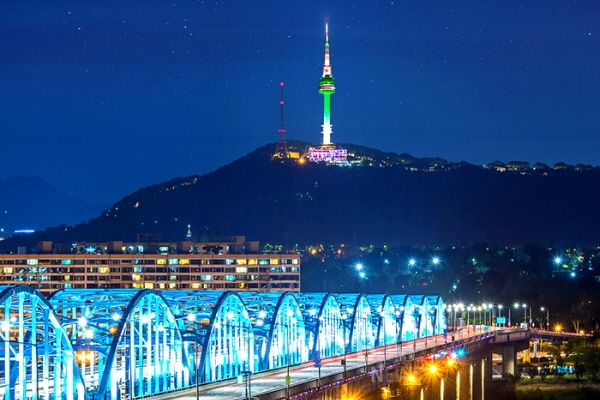

In [ ]:
from IPython.display import Image

Image('sample.jpg')

- 이미지를 표시하는 과정을 실습합니다. 이는 데이터 시각화 및 결과 확인에 유용한 방법입니다.

## 08-006 이미지 인코딩
- 이 실습에서는 이미지를 Base64 형식으로 인코딩하는 함수를 정의합니다. encode_image 함수는 주어진 이미지 경로를 사용하여 이미지를 바이너리 형식으로 읽고, 이를 Base64로 인코딩하여 문자열로 반환합니다.

In [ ]:
import base64

def encode_image(image_path):
    with open(image_path, "rb") as image_file:
        return base64.b64encode(image_file.read()).decode("utf-8")

encoded_image = encode_image('sample.jpg')

- 이미지를 Base64 형식으로 인코딩하는 과정을 실습합니다. 이는 웹에서 이미지를 전송하거나 저장하는 데 유용한 방법입니다.

## 08-007 이미지 분석 메시지 구성
- 이 실습에서는 이미지 분석을 위한 메시지를 구성합니다. 시스템 메시지를 통해 비주얼 분석가의 역할을 정의하고, 사용자 메시지로 이미지의 URL을 포함합니다. base64 인코딩된 이미지를 사용하여 주어진 내용을 전달할 수 있습니다.

In [ ]:
messages = [
    {"role": "system",
     "content": "당신은 비주얼 분석가입니다. 주어진 이미지를 보고 이미지 속에 포함된 요소들을 면밀히 관찰하고, 각 요소가 어떤 의미를 가지고 있는지 분석하세요. 이미지의 색상, 구성, 인물의 표정과 자세, 배경 요소, 조명 등 모든 시각적 요소를 분석하여 이미지가 전달하고자 하는 메시지나 감정을 설명하세요. 또한, 이 이미지가 제작된 문화적, 사회적, 역사적 배경을 고려하여 추가적인 해석을 한국어로 제공하세요."},
    {"role": "user",
     "content": [{
         "type": "image_url",
         "image_url": {"url": f"data:image/jpg;base64,{encoded_image}"}}]}
]

- 이미지 분석을 위한 메시지를 구성하는 과정을 실습합니다. 이는 NLP 모델이 비주얼 콘텐츠를 이해하고 해석하는 데 필요한 방법을 보여줍니다.

## 08-008 이미지 분석 요청
- 이 실습에서는 이전에 구성한 메시지를 사용하여 GPT 모델에 이미지 분석 요청을 수행합니다. llm.invoke() 함수를 호출하여 주어진 메시지를 전달하면, 모델이 이미지에 대한 분석 결과를 생성하여 반환합니다.

In [ ]:
llm.invoke(messages)

AIMessage(content='이 이미지는 서울의 남산타워(서울타워)와 그 주변의 야경을 담고 있습니다. \n\n### 시각적 요소 분석:\n1. **조명**: 서울타워는 녹색과 다양한 색상의 조명으로 밝히고 있어, 도시의 상징적인 랜드마크로서의 존재감을 드러냅니다. 조명의 색상은 생동감과 현대적인 느낌을 주며, 밤하늘의 별들과 어우러져 경관을 한층 아름답게 만듭니다.\n\n2. **구성**: 아래쪽에는 푸른빛의 아치형 다리가 있으며, 그 위에 흐르는 차량의 불빛이 보입니다. 이는 도시의 동적인 모습을 강조하고 있습니다. 다리의 아치 형태는 시각적으로 안정감을 주며, 도시와 자연의 조화를 나타냅니다.\n\n3. **배경**: 남산의 높은 위치는 서울의 스카이라인을 형성하는 중요한 요소로 작용하며, 도시가 자연과 함께 공존하는 모습을 보여줍니다.\n\n4. **색상**: 전체적으로 차가운 색조가 주를 이루지만, 서울타워의 따뜻한 조명이 대비를 이루며 시선을 끌고 있습니다. 이는 보는 이에게 현대적이고 활기찬 느낌을 전달합니다.\n\n### 문화적, 사회적, 역사적 배경:\n서울타워는 한국의 대표적인 관광지 중 하나로, 많은 사람들이 방문하는 장소입니다. 이곳은 서울의 역사와 현대가 어우러지는 상징적 공간으로, 도시의 발전과 변화의 상징이기도 합니다. 야경은 서울의 활기와 젊은 에너지를 나타내며, 특히 야경을 즐기기 위해 많은 관광객이 찾는 명소입니다. 이러한 이미지는 서울의 현대적 도시 이미지를 강화하고, 동시에 과거와 현재가 연결되는 지점을 상징합니다.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 412, 'prompt_tokens': 14294, 'total_tokens': 14706, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'promp

- 구성된 메시지를 통해 이미지 분석 요청을 수행하고, 그 결과를 확인하는 과정을 실습합니다. 이는 NLP 모델이 비주얼 콘텐츠에 대한 통찰을 제공하는 방법을 보여줍니다.

## 08-009 ChatOpenAI 인스턴스 생성
- 이 실습에서는 ChatOpenAI 클래스를 사용하여 모델 인스턴스를 생성합니다. 사용할 모델, 최대 토큰 수, 응답의 창의성을 조절하는 온도를 설정하여 인스턴스를 초기화합니다. 이러한 설정은 모델의 응답 특성에 큰 영향을 미칩니다.

In [ ]:
from langchain_openai import ChatOpenAI

# ChatOpenAI 인스턴스를 생성하면서 모델과 파라미터를 설정.
model = ChatOpenAI(
    model="gpt-4o-mini",  # 사용할 모델을 "gpt-4o-mini"로 지정.
    max_tokens=2048,      # 모델이 반환할 최대 토큰 수를 2048로 설정
    temperature=0.1,      # 모델의 응답 창의성을 조절하는 파라미터. 0.1로 설정하여 더 예측 가능한 응답을 유도.
)

- ChatOpenAI 인스턴스를 생성하고 설정하는 과정을 실습합니다. 이는 모델을 활용하여 특정 작업을 수행하는 데 필요한 초기 설정을 보여줍니다.

## 08-010 Output Parser 생성
- 이 실습에서는 StrOutputParser 클래스를 사용하여 문자열 출력을 처리하는 파서를 생성합니다. 이 파서는 모델의 출력을 문자열 형식으로 변환하고, 이후 작업에 사용할 수 있도록 준비합니다.

In [ ]:
from langchain_core.output_parsers import StrOutputParser

parser = StrOutputParser()
parser

StrOutputParser()

- Output Parser를 생성하여 모델의 출력을 처리하는 과정을 실습합니다. 이는 NLP 모델의 결과를 적절한 형식으로 변환하는 데 유용합니다.

## 08-011 ChatPromptTemplate 생성 및 사용
- 이 실습에서는 ChatPromptTemplate을 사용하여 사용자와 시스템 간의 대화 형식의 프롬프트를 생성합니다. 시스템 메시지를 통해 번역할 언어를 설정하고, 사용자 메시지를 통해 번역할 텍스트를 입력합니다. 최종적으로 invoke() 메서드를 사용하여 결과를 얻습니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

system_template = "Translate the following into {language}:"
prompt_template = ChatPromptTemplate.from_messages(
    [("system", system_template),
     ("user", "{text}")]
)
result = prompt_template.invoke({"language": "spanish", "text": "hello"})
result

ChatPromptValue(messages=[SystemMessage(content='Translate the following into spanish:', additional_kwargs={}, response_metadata={}), HumanMessage(content='hello', additional_kwargs={}, response_metadata={})])

- ChatPromptTemplate을 생성하고 이를 사용하여 텍스트 번역 요청을 수행하는 과정을 실습합니다. 이는 NLP 모델과의 상호작용을 관리하는 데 유용한 방법입니다.

## 08-012 체인 구성 및 실행
- 이 실습에서는 ChatPromptTemplate, 모델, 및 출력 파서를 연결하여 체인을 구성합니다. 이 체인은 입력 텍스트를 번역 요청으로 변환하고, 모델을 통해 번역을 수행한 후 결과를 문자열로 파싱합니다. 마지막으로 invoke() 메서드를 사용하여 스페인어로 'hello.'라는 텍스트를 번역합니다.

In [ ]:
chain = prompt_template | model | parser
chain.invoke({"language": "spanish", "text": "hello."})

'Hola.'

- 체인을 구성하고 이를 통해 번역 요청을 수행하는 과정을 실습합니다. 이는 다양한 구성 요소를 연결하여 NLP 작업을 수행하는 방법을 보여줍니다.

## 08-013 체인 구성 및 실행
- 이 실습에서는 앞서 구성한 체인을 사용하여 한국어로 'hello.'라는 텍스트를 번역합니다. 체인은 프롬프트 템플릿, 모델, 출력 파서를 연결하여 입력 텍스트를 처리합니다.

In [ ]:
chain = prompt_template | model | parser
chain.invoke({"language": "korean", "text": "hello."})

'안녕하세요.'

- 체인을 사용하여 입력 텍스트를 한국어로 번역하는 과정을 실습합니다. 이는 다양한 NLP 작업을 효과적으로 수행하기 위한 체인 구성 방법을 보여줍니다.

## 08-014 PromptTemplate 및 체인 구성
- 이 실습에서는 ChatOpenAI 모델과 PromptTemplate을 사용하여 주제를 설명하는 체인을 구성합니다. 사용자가 입력한 주제에 대해 한 문장으로 설명해주는 프롬프트 템플릿을 설정하고, 이를 모델과 연결하여 최종 출력 결과를 문자열로 파싱합니다.

In [ ]:
from langchain_openai import ChatOpenAI
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

llm = ChatOpenAI(model="gpt-4o-mini")
prompt = PromptTemplate.from_template("{topic} 에 대하여 한 문장으로 설명해줘.")
chain = prompt | llm | StrOutputParser()

- PromptTemplate을 사용하여 주제를 설명하는 체인을 구성하는 과정을 실습합니다. 이는 사용자 정의 프롬프트를 활용하여 모델과 상호작용하는 방법을 보여줍니다.

## 08-015 토픽에 대한 스트림 생성 및 출력
- 이 실습에서는 구성한 체인을 사용하여 '인공지능'이라는 토픽에 대한 설명을 스트림 형태로 생성하고, 각 토큰을 반복하여 출력합니다. 줄바꿈 없이 내용을 이어서 출력하고, 버퍼를 즉시 비워 실시간으로 결과를 보여줍니다.

In [ ]:
# '인공지능' 토픽에 대한 스트림을 생성하고 반복합니다.
for token in chain.stream({"topic": "인공지능"}):
    # 스트림에서 받은 데이터의 내용을 출력합니다. 줄바꿈 없이 이어서 출력하고, 버퍼를 즉시 비웁니다.
    print(token, end="", flush=True)

인공지능은 기계가 인간의 지능을 모방하거나 학습하여 문제를 해결하고 의사 결정을 할 수 있도록 하는 기술입니다.

- 주어진 토픽에 대한 설명을 스트림 형태로 생성하고 출력하는 과정을 실습합니다. 이는 모델의 출력 결과를 실시간으로 확인하는 방법을 보여줍니다.

## 08-016 주제에 대한 invoke 호출
- 이 실습에서는 구성한 체인의 invoke 메서드를 사용하여 '삼성전자'라는 주제에 대한 설명을 요청합니다. 주제 정보를 딕셔너리 형식으로 전달하여 모델이 해당 주제에 대해 응답하도록 합니다.

In [ ]:
# chain 객체의 invoke 메서드를 호출하고, '삼성전자'라는 주제로 딕셔너리를 전달합니다.
chain.invoke({"topic": "삼성전자"})

'삼성전자는 세계적인 전자 제품 제조업체로, 스마트폰, 반도체, 가전제품 등 다양한 분야에서 혁신적인 기술과 제품을 제공하는 글로벌 리더입니다.'

- 체인의 invoke 메서드를 호출하여 특정 주제에 대한 설명을 요청하는 과정을 실습합니다. 이는 모델이 주제에 따라 적절한 출력을 생성하는 방법을 보여줍니다.

## 08-017 주제 리스트 배치 처리
- 이 실습에서는 주어진 주제 리스트를 배치 처리하여 여러 주제에 대한 설명을 동시에 요청합니다. chain.batch() 메서드를 사용하여 각 주제 정보를 포함한 딕셔너리 리스트를 전달하면, 모델이 각각의 주제에 대한 응답을 생성합니다.

In [ ]:
# 주어진 토픽 리스트를 배치 처리하는 함수 호출
chain.batch([{"topic": "온디바이스AI"}, {"topic": "가우스AI"}])

['온디바이스 AI는 데이터 처리가 기기 자체에서 이루어져 개인 정보 보호와 낮은 지연 시간을 제공하는 인공지능 기술입니다.',
 '가우스AI는 인공지능 기반의 데이터 분석 및 예측 솔루션으로, 특히 통계적 방법론을 활용하여 복잡한 데이터를 이해하고 인사이트를 제공하는 플랫폼입니다.']

- 주제 리스트를 배치 처리하여 여러 주제에 대한 설명을 동시에 요청하는 과정을 실습합니다. 이는 효율적으로 여러 요청을 처리하는 방법을 보여줍니다.

## 08-018 주제 리스트 배치 처리 (동시 처리 설정)
- 이 실습에서는 주어진 주제 리스트를 배치 처리하면서 동시 처리 개수를 설정합니다. chain.batch() 메서드를 사용하여 여러 주제 정보를 전달하고, max_concurrecy 파라미터를 통해 동시에 처리할 요청의 수를 제한합니다.

In [ ]:
chain.batch(
    [
        {"topic": "머신러닝"},
        {"topic": "인공지능"},
        {"topic": "LangChain"},
        {"topic": "ChatGPT"},
        {"topic": "Llama"},
    ],
    config={"max_concurrecy": 3},
)

['머신러닝은 데이터를 기반으로 패턴을 학습하여 예측이나 결정을 자동으로 수행하는 인공지능의 한 분야입니다.',
 '인공지능은 인간의 지능을 모방하여 학습, 추론, 문제 해결 등의 작업을 수행하는 컴퓨터 시스템이나 프로그램입니다.',
 'LangChain은 자연어 처리 모델과 다양한 데이터 소스를 연결하여 고급 애플리케이션을 구축할 수 있도록 지원하는 프레임워크입니다.',
 'ChatGPT는 자연어 처리 기술을 기반으로 한 인공지능 언어 모델로, 사용자와의 대화를 통해 정보를 제공하고 다양한 질문에 답변하는 기능을 갖추고 있습니다.',
 '라마(Llama)는 남아메리카 안데스 지역에 서식하는 대형 낙타과 동물로, 주로 짐을 나르거나 털을 제공하는 용도로 길러진다.']

- 주제 리스트를 배치 처리하고 동시 처리 개수를 설정하는 과정을 실습합니다. 이는 효율적으로 여러 요청을 관리하고, 처리 성능을 최적화하는 방법을 보여줍니다.

## 08-019 한국어에서 영어로 번역 요청
- 이 실습에서는 ChatOpenAI 모델을 사용하여 주어진 한국어 문장을 영어로 번역 요청합니다. SystemMessage를 통해 번역 요청의 맥락을 설정하고, HumanMessage로 번역할 문장을 입력합니다. invoke() 메서드를 통해 번역 결과를 얻습니다.

In [ ]:
from langchain_core.messages import HumanMessage, SystemMessage
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(
    model="gpt-4o-mini",  # 사용할 모델을 "gpt-4o-mini"로 지정.
    max_tokens=2048,      # 모델이 반환할 최대 토큰 수를 2048로 설정
    temperature=0.1,      # 모델의 응답 창의성을 조절하는 파라미터. 0.1로 설정하여 더 예측 가능한 응답을 유도.
)

messages = [
    SystemMessage(content="Translate the following from Korean into English"),
    HumanMessage(content="안녕하세요. 만나서 반갑습니다."),
]

result = llm.invoke(messages)
result

AIMessage(content='Hello. Nice to meet you.', additional_kwargs={'refusal': None}, response_metadata={'token_usage': {'completion_tokens': 7, 'prompt_tokens': 27, 'total_tokens': 34, 'completion_tokens_details': {'audio_tokens': None, 'reasoning_tokens': 0}, 'prompt_tokens_details': {'audio_tokens': None, 'cached_tokens': 0}}, 'model_name': 'gpt-4o-mini-2024-07-18', 'system_fingerprint': 'fp_482c22a7bc', 'finish_reason': 'stop', 'logprobs': None}, id='run-5c2124e4-04b1-4def-85eb-1bdd4f72ca24-0', usage_metadata={'input_tokens': 27, 'output_tokens': 7, 'total_tokens': 34, 'input_token_details': {'cache_read': 0}, 'output_token_details': {'reasoning': 0}})

- 한국어 문장을 영어로 번역하는 요청을 수행하는 과정을 실습합니다. 이는 NLP 모델의 번역 능력을 활용하는 방법을 보여줍니다.

## 08-020 PromptTemplate 객체 생성
- 이 실습에서는 PromptTemplate을 사용하여 특정 형식의 질문을 생성하는 객체를 만듭니다. {country}는 사용자가 입력할 값이 들어갈 자리 표시자로 사용되며, 이를 통해 동적으로 질문을 구성할 수 있습니다.

In [ ]:
from langchain_core.prompts import PromptTemplate

# {country}는 이후에 값이 들어갈 자리를 의미
template = "{country}의 수도는 어디인가요?"

# from_template 메소드를 이용하여 PromptTemplate 객체 생성
prompt = PromptTemplate.from_template(template)
prompt

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도는 어디인가요?')

- PromptTemplate 객체를 생성하여 동적인 질문 형식을 구성하는 과정을 실습합니다. 이는 사용자 입력을 기반으로 모델과 상호작용하는 방법을 보여줍니다.

## 08-021 PromptTemplate을 통한 프롬프트 생성
- 이 실습에서는 생성한 PromptTemplate 객체의 format 메소드를 사용하여 {country} 자리 표시자에 '대한민국' 값을 넣어 최종 질문을 생성합니다. 이 방식으로 동적인 질문을 쉽게 만들 수 있습니다.

In [ ]:
# format 메소드를 이용하여 변수에 값을 넣어 프롬프트 생성
prompt = prompt.format(country="대한민국")
prompt

'대한민국의 수도는 어디인가요?'

- PromptTemplate의 format 메소드를 사용하여 사용자 지정 값을 포함한 질문을 생성하는 과정을 실습합니다. 이는 입력값에 따라 질문을 동적으로 구성하는 방법을 보여줍니다.

## 08-022 PromptTemplate 객체 생성
- 이 실습에서는 PromptTemplate 클래스를 사용하여 template과 input_variables를 명시하여 PromptTemplate 객체를 생성합니다. input_variables는 나중에 값을 대입할 수 있는 변수 목록입니다.

In [ ]:
# PromptTemplate 객체를 활용하여 prompt_template 생성
prompt = PromptTemplate(
    template=template,
    input_variables=["country"],
)
prompt

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도는 어디인가요?')

- PromptTemplate 객체를 생성하여 입력 변수를 정의하는 과정을 실습합니다. 이는 질문 형식을 동적으로 구성하는 데 필요한 기본 설정을 제공합니다.

## 08-023 프롬프트 생성 및 변수 삽입
- 이 실습에서는 생성된 PromptTemplate 객체를 사용하여 format 메소드를 통해 '대한민국' 값을 넣어 최종 질문을 생성합니다. 이 과정은 동적 프롬프트 생성의 기초적인 예입니다.

In [ ]:
# prompt 생성
prompt.format(country="대한민국")

'대한민국의 수도는 어디인가요?'

- PromptTemplate을 사용하여 특정 변수에 값을 넣어 프롬프트를 생성하는 과정을 실습합니다. 이는 사용자의 입력에 따라 질문을 유연하게 구성하는 방법을 보여줍니다.

## 08-024 PromptTemplate 객체 생성 (부분 변수 포함)
- 이 실습에서는 PromptTemplate 객체를 생성할 때 부분 변수를 사용하여 template에 포함된 변수 중 일부에 값을 미리 설정합니다. country2에 대한 값은 '미국'으로 설정하고, country1은 이후에 입력될 수 있도록 합니다.

In [ ]:
# template 정의
template = "{country1}과 {country2}의 수도는 각각 어디인가요?"
# PromptTemplate 객체를 활용하여 prompt_template 생성
prompt = PromptTemplate(
    template=template,
    input_variables=["country1"],
    partial_variables={
        "country2": "미국"  # dictionary 형태로 partial_variables를 전달
    },
)
prompt

PromptTemplate(input_variables=['country1'], input_types={}, partial_variables={'country2': '미국'}, template='{country1}과 {country2}의 수도는 각각 어디인가요?')

- 부분 변수를 포함한 PromptTemplate 객체를 생성하는 과정을 실습합니다. 이는 여러 변수를 효율적으로 관리하는 방법을 보여줍니다.

## 08-025 부분 변수를 사용한 프롬프트 생성
- 이 실습에서는 생성된 PromptTemplate 객체를 사용하여 format 메소드를 통해 '대한민국' 값을 넣어 최종 질문을 생성합니다. country2는 미리 설정된 값인 '미국'으로 사용됩니다.

In [ ]:
prompt.format(country1="대한민국")

'대한민국과 미국의 수도는 각각 어디인가요?'

- 부분 변수를 사용하여 최종 프롬프트를 생성하는 과정을 실습합니다. 이는 여러 입력 변수를 효과적으로 활용하는 방법을 보여줍니다.

## 08-026 부분 변수로 PromptTemplate 수정
- 이 실습에서는 기존의 PromptTemplate 객체에서 partial 메소드를 사용하여 country2 변수의 값을 '일본'으로 수정합니다. 이를 통해 새로운 PromptTemplate 객체를 생성할 수 있습니다.

In [ ]:
prompt_partial = prompt.partial(country2="일본")
prompt_partial

PromptTemplate(input_variables=['country1'], input_types={}, partial_variables={'country2': '일본'}, template='{country1}과 {country2}의 수도는 각각 어디인가요?')

- 부분 변수를 사용하여 PromptTemplate을 수정하는 과정을 실습합니다. 이는 기존 프롬프트를 기반으로 새로운 프롬프트를 유연하게 구성하는 방법을 보여줍니다.

## 08-027 수정된 PromptTemplate으로 프롬프트 생성
- 이 실습에서는 수정된 PromptTemplate 객체를 사용하여 format 메소드를 통해 '대한민국' 값을 넣어 최종 질문을 생성합니다. country2는 이전에 설정된 값인 '일본'으로 사용됩니다.

In [ ]:
prompt_partial.format(country1="대한민국")

'대한민국과 일본의 수도는 각각 어디인가요?'

- 수정된 PromptTemplate을 사용하여 최종 프롬프트를 생성하는 과정을 실습합니다. 이는 변수 값을 변경하여 다양한 질문을 생성하는 방법을 보여줍니다.

## 08-028 현재 날짜 가져오기
- 이 실습에서는 현재 날짜를 가져오는 함수를 정의합니다. get_date() 함수는 현재 날짜를 '월 일' 형식으로 반환합니다.

In [ ]:
from datetime import datetime

def get_date():
    return datetime.now().strftime("%m월%d일")
get_date()

'10월21일'

- 현재 날짜를 특정 형식으로 가져오는 함수를 실습합니다. 이는 날짜 형식을 다루는 기본적인 방법을 보여줍니다.

## 08-029 PromptTemplate 생성 (함수 사용)
- 이 실습에서는 현재 날짜를 반환하는 함수를 사용하여 PromptTemplate을 생성합니다. template 문자열에서 {date}는 get_date() 함수의 결과로 대체되며, {n}은 사용자가 입력할 값으로 설정됩니다.

In [ ]:
prompt = PromptTemplate(
    template="오늘은 {date} 입니다. 과거에 있었던 주요한 이벤트를 {n}개를 알려주세요.",
    input_variables=["n"],
    partial_variables={
        "date": get_date
    }
)

- 함수를 사용하여 부분 변수를 포함한 PromptTemplate을 생성하는 과정을 실습합니다. 이는 동적인 날짜 정보를 프롬프트에 포함하는 방법을 보여줍니다.

## 08-030 프롬프트 생성 및 변수 삽입
- 이 실습에서는 생성된 PromptTemplate 객체를 사용하여 format 메소드를 통해 {n} 자리에 3을 넣어 최종 질문을 생성합니다. {date}는 get_date() 함수의 결과로 대체됩니다.

In [ ]:
# prompt 생성
prompt.format(n=3)

'오늘은 10월21일 입니다. 과거에 있었던 주요한 이벤트를 3개를 알려주세요.'

- PromptTemplate을 사용하여 특정 변수에 값을 넣어 프롬프트를 생성하는 과정을 실습합니다. 이는 사용자의 입력에 따라 질문을 유연하게 구성하는 방법을 보여줍니다.

## 08-031 체인 실행 및 결과 확인
- 이 실습에서는 PromptTemplate과 ChatOpenAI 모델을 연결하여 체인을 생성합니다. chain.invoke(3)을 호출하여 입력값으로 3을 전달하고, 최종 결과를 출력합니다.

In [ ]:
# chain 을 실행 후 결과를 확인합니다.
chain = prompt | llm
print(chain.invoke(3).content)

10월 21일에 있었던 주요한 역사적 이벤트 중 세 가지를 소개합니다:

1. **1805년 - 트라팔가르 해전**: 영국 해군이 나폴레옹 전쟁 중 스페인과 프랑스 연합 함대를 상대로 승리한 전투입니다. 이 전투에서 영국의 넬슨 제독이 전사했지만, 영국 해군의 우세를 확립하는 중요한 전투로 평가받고 있습니다.

2. **1879년 - 토마스 에디슨의 전구 발명**: 토마스 에디슨이 전구의 상업적 모델을 개발하여 전기를 이용한 조명의 시대를 열었습니다. 이 발명은 현대 사회의 발전에 큰 영향을 미쳤습니다.

3. **1944년 - 필리핀 전투 시작**: 제2차 세계대전 중 필리핀에서 미국과 일본 간의 대규모 전투가 시작되었습니다. 이 전투는 미국의 필리핀 재탈환을 위한 중요한 전투로, 전쟁의 전환점 중 하나로 여겨집니다.

이 외에도 10월 21일에는 다양한 역사적 사건들이 있었으니, 관심 있는 분야에 따라 더 많은 정보를 찾아보실 수 있습니다.


- 체인을 실행하여 모델의 응답을 확인하는 과정을 실습합니다. 이는 입력값에 따른 모델의 동작을 검토하는 데 유용합니다.

## 08-032 JAEN에서 파일 다운로드
- 이 실습에서는 JAEN 라이브러리를 사용하여 'capitalyaml'이라는 파일을 다운로드합니다. download_file 함수를 호출하여 해당 파일을 다운로드하고, 이후에 사용할 수 있도록 준비합니다.

In [ ]:
from JAEN import download_file

download_file('capitalyaml')

파일이 성공적으로 다운로드되었습니다: capital_info.yaml
절대 경로: /content/capital_info.yaml
상대 경로: capital_info.yaml


- JAEN 라이브러리를 사용하여 파일을 다운로드하는 과정을 실습합니다. 이는 데이터나 리소스를 가져오는 데 유용한 방법입니다.

## 08-033 YAML 파일에서 프롬프트 로드
- 이 실습에서는 YAML 파일에서 프롬프트를 로드합니다. load_prompt 함수를 사용하여 'capital_info.yaml' 파일을 읽고, 해당 파일에 정의된 프롬프트를 사용하여 모델과 상호작용할 수 있게 합니다.

In [ ]:
from langchain_core.prompts import load_prompt

prompt = load_prompt("capital_info.yaml", encoding="utf-8")
prompt

PromptTemplate(input_variables=['country'], input_types={}, partial_variables={}, template='{country}의 수도에 대해서 알려주세요.\n수도의 특징을 다음의 양식에 맞게 정리해 주세요.\n300자 내외로 작성해 주세요.\n한글로 작성해 주세요.\n----\n[양식]\n1. 면적\n2. 인구\n3. 역사적 장소\n4. 특산품\n\n#Answer:\n')

- YAML 파일에서 프롬프트를 로드하는 과정을 실습합니다. 이는 외부 파일에서 설정된 프롬프트를 효과적으로 활용하는 방법을 보여줍니다.

## 08-034 ChatPromptTemplate 생성 및 메시지 생성
- 이 실습에서는 ChatPromptTemplate을 사용하여 여러 역할에 대한 메시지를 구성합니다. format_messages 메소드를 사용하여 {name} 및 {user_input} 변수에 값을 삽입하여 최종 메시지를 생성합니다.

In [ ]:
from langchain_core.prompts import ChatPromptTemplate

chat_template = ChatPromptTemplate.from_messages(
    [
        # role, message
        ("system", "당신은 친절한 AI 어시스턴트입니다. 당신의 이름은 {name} 입니다."),
        ("human", "반가워요!"),
        ("ai", "안녕하세요! 무엇을 도와드릴까요?"),
        ("human", "{user_input}"),
    ]
)

# 챗 message 를 생성합니다.
messages = chat_template.format_messages(
    name="가우스", user_input="당신의 이름은 무엇입니까?"
)
messages

[SystemMessage(content='당신은 친절한 AI 어시스턴트입니다. 당신의 이름은 가우스 입니다.', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='반가워요!', additional_kwargs={}, response_metadata={}),
 AIMessage(content='안녕하세요! 무엇을 도와드릴까요?', additional_kwargs={}, response_metadata={}),
 HumanMessage(content='당신의 이름은 무엇입니까?', additional_kwargs={}, response_metadata={})]

- ChatPromptTemplate을 사용하여 메시지를 생성하는 과정을 실습합니다. 이는 여러 역할 간의 상호작용을 정의하는 데 유용합니다.

## 08-035 메시지를 통해 모델에 요청
- 이 실습에서는 생성된 메시지를 사용하여 ChatOpenAI 모델에 요청을 보냅니다. llm.invoke() 메서드를 호출하여 메시지를 전달하고, 모델의 응답 내용을 확인합니다.

In [ ]:
llm.invoke(messages).content

'제 이름은 가우스입니다! 당신은 어떤 이름을 가지고 계신가요?'

- 생성된 메시지를 통해 모델에 요청하고, 그 결과를 확인하는 과정을 실습합니다. 이는 NLP 모델과의 상호작용을 효과적으로 관리하는 방법을 보여줍니다.

## 08-036 체인 실행 및 모델에 요청
- 이 실습에서는 ChatPromptTemplate과 ChatOpenAI 모델을 연결하여 체인을 구성합니다. chain.invoke() 메서드를 호출하여 사용자 이름과 입력 문장을 전달하고, 모델의 응답 내용을 확인합니다.

In [ ]:
chain = chat_template | llm
chain.invoke({"name": "가우스", "user_input": "당신의 이름은 무엇입니까?"}).content

'제 이름은 가우스입니다! 당신과 대화하게 되어 기쁩니다. 어떤 질문이나 도움이 필요하신가요?'

- 체인을 실행하여 입력값에 대한 모델의 응답을 확인하는 과정을 실습합니다. 이는 모델과의 상호작용을 효과적으로 관리하는 방법을 보여줍니다.

## 08-037 퓨샷 예시 데이터 정의
- 이 실습에서는 가전제품 고장과 관련된 질문과 그에 대한 대처 방법을 포함하는 예제 데이터를 정의합니다. 각 예제는 질문과 해당 질문에 대한 적절한 답변으로 구성됩니다.

In [ ]:
# 퓨샷 예시
# 예제 데이터: 가전제품 고장과 대처 방법
examples = [
    {
        "question": "세탁기가 작동하지 않아요. 어떻게 해야 하나요?",
        "answer": """
1. 세탁기의 전원 케이블이 콘센트에 제대로 연결되어 있는지 확인해 주세요.
2. 세탁기의 전원 스위치가 "ON" 상태인지 확인해 주세요.
3. 세탁기의 문이 완전히 닫혀 있는지 확인해 주세요. 세탁기는 문이 열려 있을 때 작동하지 않을 수 있습니다.
4. 위의 방법으로 문제가 해결되지 않으면, 삼성 서비스 웹사이트를 방문하거나 가까운 서비스 센터에 문의하여 전문적인 점검을 받으세요.
""",
    },
    {
    "question": "냉장고가 시원하지 않아요. 어떻게 해야 하나요?",
    "answer": """
1. 냉장고의 온도 조절기가 적절히 설정되어 있는지 확인해 주세요. 너무 높은 온도 설정은 냉장고의 성능을 저하시킬 수 있습니다.
2. 냉장고의 문이 제대로 닫혀 있는지 확인해 주세요. 문이 제대로 닫히지 않으면 냉기가 새어나갈 수 있습니다.
3. 냉장고의 팬과 통풍구가 막히지 않았는지 확인해 주세요. 공기 흐름이 원활해야 냉각이 제대로 이루어집니다.
4. 냉장고의 뒷면과 측면에 먼지나 이물질이 쌓여 있는지 확인하고 청소해 주세요. 먼지가 쌓이면 냉각 성능이 저하될 수 있습니다.
5. 위의 방법으로 문제가 해결되지 않으면, 삼성 서비스 웹사이트를 방문하거나 가까운 서비스 센터에 문의하여 전문적인 점검을 받으세요.
"""
    },
    {
    "question": "에어컨이 작동하지 않아요. 어떻게 해야 하나요?",
    "answer": """
1. 에어컨의 전원 코드가 제대로 연결되어 있는지 확인해 주세요.
2. 에어컨의 전원 스위치가 "ON" 상태인지 확인해 주세요.
3. 리모컨의 배터리가 충분한지 확인하고, 배터리를 교체해 보세요.
4. 에어컨의 필터가 막히거나 더러워졌는지 확인하고 청소해 주세요.
5. 위의 방법으로 문제가 해결되지 않으면, 삼성 서비스 웹사이트를 방문하거나 가까운 서비스 센터에 문의하여 전문적인 점검을 받으세요.
"""    }
]

- 퓨샷 예시 데이터를 정의하는 과정을 실습합니다. 이는 특정 주제에 대한 질문과 답변을 구조화하여 모델 훈련에 활용하는 방법을 보여줍니다.

## 08-038 예제 프롬프트 생성 및 출력
- 이 실습에서는 예제 데이터에서 첫 번째 항목을 사용하여 질문과 답변 형식의 프롬프트를 생성합니다. format 메소드를 통해 'question'과 'answer' 변수를 채워 최종 프롬프트를 출력합니다.

In [ ]:
example_prompt = PromptTemplate.from_template(
    "Question:\n{question}\nAnswer:\n{answer}"
)

print(example_prompt.format(**examples[0]))

Question:
세탁기가 작동하지 않아요. 어떻게 해야 하나요?
Answer:

1. 세탁기의 전원 케이블이 콘센트에 제대로 연결되어 있는지 확인해 주세요.
2. 세탁기의 전원 스위치가 "ON" 상태인지 확인해 주세요.
3. 세탁기의 문이 완전히 닫혀 있는지 확인해 주세요. 세탁기는 문이 열려 있을 때 작동하지 않을 수 있습니다.
4. 위의 방법으로 문제가 해결되지 않으면, 삼성 서비스 웹사이트를 방문하거나 가까운 서비스 센터에 문의하여 전문적인 점검을 받으세요.



- 예제 데이터를 기반으로 질문과 답변 형식의 프롬프트를 생성하고 출력하는 과정을 실습합니다. 이는 모델에게 제공할 질문과 그에 대한 답변 형식을 구성하는 방법을 보여줍니다.

## 08-039 FewShotPromptTemplate 생성 및 출력
- 이 실습에서는 FewShotPromptTemplate을 사용하여 주어진 예제 데이터를 기반으로 질문에 대한 답변 형식의 프롬프트를 생성합니다. 입력 변수로 질문을 받고, 기존 예제와 함께 최종 프롬프트를 출력합니다.

In [ ]:
from langchain_core.prompts.few_shot import FewShotPromptTemplate

prompt = FewShotPromptTemplate(
    examples=examples,
    example_prompt=example_prompt,
    suffix="Question:\n{question}\nAnswer:",
    input_variables=["question"],
)

question = "공기청정기를 작동해도 미세먼지 농도가 줄어들지 않아요."
final_prompt = prompt.format(question=question)
print(final_prompt)

Question:
세탁기가 작동하지 않아요. 어떻게 해야 하나요?
Answer:

1. 세탁기의 전원 케이블이 콘센트에 제대로 연결되어 있는지 확인해 주세요.
2. 세탁기의 전원 스위치가 "ON" 상태인지 확인해 주세요.
3. 세탁기의 문이 완전히 닫혀 있는지 확인해 주세요. 세탁기는 문이 열려 있을 때 작동하지 않을 수 있습니다.
4. 위의 방법으로 문제가 해결되지 않으면, 삼성 서비스 웹사이트를 방문하거나 가까운 서비스 센터에 문의하여 전문적인 점검을 받으세요.


Question:
냉장고가 시원하지 않아요. 어떻게 해야 하나요?
Answer:

1. 냉장고의 온도 조절기가 적절히 설정되어 있는지 확인해 주세요. 너무 높은 온도 설정은 냉장고의 성능을 저하시킬 수 있습니다.
2. 냉장고의 문이 제대로 닫혀 있는지 확인해 주세요. 문이 제대로 닫히지 않으면 냉기가 새어나갈 수 있습니다.
3. 냉장고의 팬과 통풍구가 막히지 않았는지 확인해 주세요. 공기 흐름이 원활해야 냉각이 제대로 이루어집니다.
4. 냉장고의 뒷면과 측면에 먼지나 이물질이 쌓여 있는지 확인하고 청소해 주세요. 먼지가 쌓이면 냉각 성능이 저하될 수 있습니다.
5. 위의 방법으로 문제가 해결되지 않으면, 삼성 서비스 웹사이트를 방문하거나 가까운 서비스 센터에 문의하여 전문적인 점검을 받으세요.


Question:
에어컨이 작동하지 않아요. 어떻게 해야 하나요?
Answer:

1. 에어컨의 전원 코드가 제대로 연결되어 있는지 확인해 주세요.
2. 에어컨의 전원 스위치가 "ON" 상태인지 확인해 주세요.
3. 리모컨의 배터리가 충분한지 확인하고, 배터리를 교체해 보세요.
4. 에어컨의 필터가 막히거나 더러워졌는지 확인하고 청소해 주세요.
5. 위의 방법으로 문제가 해결되지 않으면, 삼성 서비스 웹사이트를 방문하거나 가까운 서비스 센터에 문의하여 전문적인 점검을 받으세요.


Question:
공기청정기를 작동해도 미세먼지 농도가 줄어들지 않아요.
Answer:


- FewShotPromptTemplate을 생성하고, 주어진 질문을 바탕으로 최종 프롬프트를 출력하는 과정을 실습합니다. 이는 모델이 특정 질문에 대해 학습된 예제에 기반하여 응답할 수 있도록 돕습니다.

## 08-040 이메일 대화 예시 정의
- 이 실습에서는 이메일 대화를 문자열로 정의합니다. 이메일의 발신자, 수신자, 제목, 내용 등이 포함되어 있으며, 이는 후속 작업에서 텍스트 분석이나 모델 학습 등에 활용할 수 있습니다.

In [ ]:
email_conversation = """From:  김민수 (minsoo.kim@samsung.com)
To: 이서윤 (seoyoon.lee@samsung.com)
Subject:  "GALAXY" 노트북 유통 협력 및 미팅 일정 제안

안녕하세요, 이서윤 프로님,

GALAXY 모델에 대한 상세한 브로슈어를 요청드립니다. 특히 기술 사양, 배터리 성능, 그리고 디자인 측면에 대한 정보가 필요합니다. 이를 통해 저희가 제안할 유통 전략과 마케팅 계획을 보다 구체화할 수 있을 것입니다.

또한, 관련 내용을 더 깊이 논의하기 위해 다음 주 화요일(1월 15일) 오전 10시에 이야기를 나눌 수 있을까요?

감사합니다.

김민수 프로
삼성전자
"""

- 이메일 대화 예시를 정의하는 과정을 실습합니다. 이는 텍스트 데이터 세트를 생성하여 모델의 입력으로 사용할 수 있는 방법을 보여줍니다.

## 08-041 이메일 내용 추출 체인 실행
- 이 실습에서는 PromptTemplate을 사용하여 이메일 내용에서 중요한 정보를 추출하는 요청을 생성합니다. 문자열 출력 파서를 통해 모델의 결과를 처리하고, 최종 결과를 출력합니다.

In [ ]:
from itertools import chain
from langchain_core.prompts import PromptTemplate
from langchain_core.output_parsers import StrOutputParser

prompt = PromptTemplate.from_template(
    "다음의 이메일 내용중 중요한 내용을 추출해 주세요.\n\n{email_conversation}"
)

llm = ChatOpenAI(temperature=0, model_name="gpt-4o")
parser = StrOutputParser() # 문자열 출력 파서 생성

chain = prompt | llm | parser # 문자열 출력 파서를 llm 출력 뒤에 체인 연결

result = await chain.ainvoke({"email_conversation": email_conversation})
print(result)

이메일의 중요한 내용은 다음과 같습니다:

1. GALAXY 모델에 대한 상세한 브로슈어 요청 (기술 사양, 배터리 성능, 디자인 정보 포함).
2. 유통 전략과 마케팅 계획 구체화를 위한 정보 필요.
3. 다음 주 화요일(1월 15일) 오전 10시에 미팅 제안.


- 이메일 내용에서 중요한 정보를 추출하는 체인을 실행하는 과정을 실습합니다. 이는 모델을 활용하여 특정 정보를 효과적으로 추출하는 방법을 보여줍니다.

## 08-042 PydanticOutputParser 생성
- 이 실습에서는 Pydantic을 사용하여 이메일 요약 모델을 정의하고, 이를 기반으로 PydanticOutputParser를 생성합니다. 이 파서는 모델의 출력을 Pydantic 모델 형식으로 변환하여 구조화된 데이터를 제공합니다.

In [ ]:
from langchain_core.output_parsers import PydanticOutputParser
from pydantic import BaseModel, Field

class EmailSummary(BaseModel):
    person: str = Field(description="메일을 보낸 사람")
    email: str = Field(description="메일을 보낸 사람의 이메일 주소")
    subject: str = Field(description="메일 제목")
    summary: str = Field(description="메일 본문을 요약한 텍스트")
    date: str = Field(description="메일 본문에 언급된 미팅 날짜와 시간")

# PydanticOutputParser 생성
parser = PydanticOutputParser(pydantic_object=EmailSummary)

- PydanticOutputParser를 생성하고 이를 통해 구조화된 데이터를 정의하는 과정을 실습합니다. 이는 모델의 출력을 더 쉽게 다룰 수 있도록 돕습니다.

## 08-043 PydanticOutputParser의 형식 지침 출력
- 이 실습에서는 PydanticOutputParser에서 제공하는 형식 지침을 출력합니다. 이 지침은 모델의 출력을 Pydantic 객체에 맞게 형식화하는 방법을 설명합니다.

In [ ]:
# instruction 을 출력합니다.
print(parser.get_format_instructions())

The output should be formatted as a JSON instance that conforms to the JSON schema below.

As an example, for the schema {"properties": {"foo": {"title": "Foo", "description": "a list of strings", "type": "array", "items": {"type": "string"}}}, "required": ["foo"]}
the object {"foo": ["bar", "baz"]} is a well-formatted instance of the schema. The object {"properties": {"foo": ["bar", "baz"]}} is not well-formatted.

Here is the output schema:
```
{"properties": {"person": {"description": "메일을 보낸 사람", "title": "Person", "type": "string"}, "email": {"description": "메일을 보낸 사람의 이메일 주소", "title": "Email", "type": "string"}, "subject": {"description": "메일 제목", "title": "Subject", "type": "string"}, "summary": {"description": "메일 본문을 요약한 텍스트", "title": "Summary", "type": "string"}, "date": {"description": "메일 본문에 언급된 미팅 날짜와 시간", "title": "Date", "type": "string"}}, "required": ["person", "email", "subject", "summary", "date"]}
```


- PydanticOutputParser의 형식 지침을 확인하는 과정을 실습합니다. 이는 데이터 형식화 및 처리 방법을 이해하는 데 도움이 됩니다.

## 08-044 프롬프트 템플릿 및 체인 생성
- 이 실습에서는 KOREAN으로 질문에 답하는 보조 도우미를 위한 프롬프트 템플릿을 작성합니다. 또한, PydanticOutputParser에서 제공하는 형식 지침을 부분 포맷팅하여 최종 프롬프트에 추가합니다. 이후, 프롬프트 템플릿과 모델, 파서를 연결하여 체인을 생성합니다.

In [ ]:
# 프롬프트 템플릿 작성
prompt = PromptTemplate.from_template(
    """
You are a helpful assistant. Please answer the following questions in KOREAN.

QUESTION:
{question}

EMAIL CONVERSATION:
{email_conversation}

FORMAT:
{format}
"""
)

# format 에 PydanticOutputParser의 부분 포맷팅(partial) 추가
prompt = prompt.partial(format=parser.get_format_instructions())

# chain 을 생성합니다.
chain = prompt | llm | parser

- 프롬프트 템플릿을 작성하고, 이를 기반으로 체인을 생성하는 과정을 실습합니다. 이는 특정 형식으로 정보를 요청하고 처리하는 방법을 보여줍니다.

## 08-045 체인 실행 및 결과 출력
- 이 실습에서는 앞서 생성한 체인을 사용하여 이메일 대화와 질문을 입력으로 제공하고, 모델의 응답을 받아 출력합니다. chain.invoke() 메서드를 통해 이메일 내용 중 주요 정보를 추출하는 요청을 수행합니다.

In [ ]:
# chain 을 실행하고 결과를 출력합니다.
result = chain.invoke(
    {
        "email_conversation": email_conversation,
        "question": "이메일 내용중 주요 내용을 추출해 주세요.",
    }
)

- 체인을 실행하여 이메일 내용에서 주요 정보를 추출하는 요청을 수행하는 과정을 실습합니다. 이는 모델의 분석 능력을 활용하는 방법을 보여줍니다.

---

# RAG

In [ ]:
%%capture
!pip install pypdf langchain langchain-openai faiss-cpu

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.5/27.5 MB 59.9 MB/s eta 0:00:00


## 08-046 JAEN에서 PDF 파일 다운로드
- 이 실습에서는 JAEN 라이브러리를 사용하여 '온디바이스 AI 기술동향 및 발전방향.pdf' 파일을 다운로드합니다. download_file 함수를 호출하여 해당 PDF 파일을 다운로드하고, 이후에 사용할 수 있도록 준비합니다.

In [ ]:
from JAEN import download_file

download_file('PDF') #온디바이스 AI 기술동향 및 발전방향.pdf

파일이 성공적으로 다운로드되었습니다: 온디바이스 AI 기술동향 및 발전방향.pdf
절대 경로: /content/온디바이스 AI 기술동향 및 발전방향.pdf
상대 경로: 온디바이스 AI 기술동향 및 발전방향.pdf


- JAEN 라이브러리를 사용하여 PDF 파일을 다운로드하는 과정을 실습합니다. 이는 데이터나 리소스를 가져오는 데 유용한 방법입니다.

## 08-047 PDF 파일 로딩 설정
- 이 실습에서는 PyPDFLoader를 사용하여 특정 PDF 파일을 로드하는 설정을 합니다. FILE_PATH 변수를 통해 로드할 PDF 파일의 경로를 지정하고, 해당 파일을 로드할 수 있는 로더 객체를 생성합니다.

In [ ]:
from langchain_community.document_loaders import PyPDFLoader

# 예제 파일 경로
FILE_PATH = "온디바이스 AI 기술동향 및 발전방향.pdf"

# 로더 설정
loader = PyPDFLoader(FILE_PATH)

- PDF 파일을 로드하는 설정 과정을 실습합니다. 이는 문서 데이터 처리의 첫 번째 단계로, 파일을 프로그램에서 사용할 수 있도록 준비하는 방법을 보여줍니다.

## 08-048 PDF 파일 로딩 및 문서 수 확인
- 이 실습에서는 설정한 PDF 로더를 사용하여 PDF 파일을 로드하고, 로드된 문서의 수를 확인합니다. loader.load() 메서드를 호출하여 PDF 파일의 내용을 읽어오고, len() 함수를 사용하여 읽어온 문서의 수를 출력합니다.

In [ ]:
# PDF 로더
docs = loader.load()

# 로드된 문서의 수 확인
len(docs)

39

- PDF 파일을 로드하고, 로드된 문서의 수를 확인하는 과정을 실습합니다. 이는 문서 데이터 처리의 두 번째 단계로, 읽어온 내용을 효과적으로 관리하는 방법을 보여줍니다.

## 08-049 첫 번째 문서 확인
- 이 실습에서는 로드한 PDF 문서 중 첫 번째 문서의 내용을 확인합니다. docs 리스트의 첫 번째 요소를 출력하여 해당 문서의 정보를 확인합니다.

In [ ]:
# 첫번째 문서 확인
docs[0]

Document(metadata={'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 0}, page_content='온디바이스 AI \n기술동향 및 발전방향ISSUE \nREPORT \n2024-06호\n')

- 로드된 PDF 파일의 첫 번째 문서를 확인하는 과정을 실습합니다. 이는 문서의 내용을 검토하고 필요한 정보를 추출하는 데 유용합니다.

## 08-050 PDF 파일을 generator 방식으로 로드
- 이 실습에서는 PDF 파일을 generator 방식으로 로드하여 각 문서의 메타데이터를 출력합니다. lazy_load() 메서드를 사용하여 메모리 효율적으로 문서를 로드하고, 각 문서의 메타데이터를 확인합니다.

In [ ]:
# generator 방식으로 문서 로드
for doc in loader.lazy_load():
    print(doc.metadata)

{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 0}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 1}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 2}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 3}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 4}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 5}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 6}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 7}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 8}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 9}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 10}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 11}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 12}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 13}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 14}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 15}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 16}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 17}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 18}
{'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'p

- PDF 파일을 generator 방식으로 로드하고 각 문서의 메타데이터를 확인하는 과정을 실습합니다. 이는 대량의 문서 데이터를 효율적으로 처리하는 방법을 보여줍니다.

## 08-051 PDF 파일을 Async 방식으로 로드
- 이 실습에서는 PDF 파일을 비동기(async) 방식으로 로드합니다. aload() 메서드를 사용하여 문서를 로드하고, 이를 통해 비동기적으로 파일을 처리할 수 있습니다.

In [ ]:
# 문서를 async 방식으로 로드
adocs = loader.aload()

- PDF 파일을 비동기 방식으로 로드하는 과정을 실습합니다. 이는 문서 로딩 시 효율성을 높이고, 다른 작업과 병행하여 진행할 수 있는 방법을 보여줍니다.

## 08-052 비동기 문서 로드
- 이 실습에서는 비동기(async) 방식으로 로드한 문서를 실제로 가져오기 위해 await 키워드를 사용합니다. 이는 비동기적으로 로드된 문서를 기다리고, 해당 문서를 사용할 수 있게 합니다.

In [ ]:
# 문서 로드
await adocs

[Document(metadata={'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 0}, page_content='온디바이스 AI \n기술동향 및 발전방향ISSUE \nREPORT \n2024-06호\n'),
 Document(metadata={'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 1}, page_content='ISSUE \nREPORT \n2024-06호\nDIGISIGHT온디바이스 AI 기술동향 및 발전방향\nⅠ. 개 요 06\nⅡ. 시장 및 기업 동향 09\nⅢ. 핵심기술 동향 12\nⅣ. 미래 발전방향 20 \n 27\n 30\n 33\n 35KEA NOW\nMEMBER NEWS\nESG TREND\nSTATS'),
 Document(metadata={'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 2}, page_content='DIGISIGHT\n   2024.06  제6호Ⅰ. 개 요\nⅡ. 시장 및 기업 동향 \nⅢ. 핵심기술 동향 \nⅣ. 미래 발전방향\n  참고문헌 \n 온디바이스 AI \n기술동향 및 발전방향'),
 Document(metadata={'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 3}, page_content='요 약\n   (정의) 온디바이스 AI(On-Device AI)란 데이터를 외부 서버나 클라우드에 전송하지  \n않고  디바이스 자체적으로 AI연산을 수행하는 기술\n◎ \x07 대용량\x07데이터\x07처리\x07제한,\x07개인정보\x07유출\x07위험,\x07실시간성\x07저하\x07등\x07기존\x07서버\x07기반\x07중앙집중형\x07 구조의\x07여러\x07\n제약사항을\x07해결하기\x07위해\x07등장\n◎ \x07 높은\x07컴퓨팅\x07파워가\x07필요한\x07AI\x07연산을\x07다양한\x07하드웨어\x07및\x07소프트웨어\x07 기술을\x07활

- 비동기 방식으로 로드한 문서를 가져오는 과정을 실습합니다. 이는 효율적인 문서 처리를 위한 비동기 작업의 활용 방법을 보여줍니다.

## 08-053 문서 분할 및 첫 번째 문서 확인
- 이 실습에서는 CharacterTextSplitter를 사용하여 로드한 문서를 지정된 크기(200자)로 분할합니다. chunk_overlap을 0으로 설정하여 겹치지 않는 문서 조각을 생성합니다. 문서 분할 후, 로드된 문서의 수를 확인하고 첫 번째 문서의 내용을 출력합니다.

In [ ]:
from langchain.text_splitter import CharacterTextSplitter

# 문자열 분할기 설정
text_splitter = CharacterTextSplitter(chunk_size=200, chunk_overlap=0)
# 문서 분할
docs = loader.load_and_split(text_splitter=text_splitter)

# 로드된 문서의 수 확인
print(len(docs))
# 첫번째 문서 확인
docs[0]

39


Document(metadata={'source': '온디바이스 AI 기술동향 및 발전방향.pdf', 'page': 0}, page_content='온디바이스 AI \n기술동향 및 발전방향ISSUE \nREPORT \n2024-06호')

- 문서를 특정 크기로 분할하는 과정을 실습합니다. 이는 대량의 텍스트 데이터를 효율적으로 처리하는 방법을 보여줍니다.

## 08-054 PDF 로더 초기화 및 페이지 내용 확인
- 이 실습에서는 rapidocr-onnxruntime 라이브러리를 설치하고, PyPDFLoader를 초기화하여 이미지 추출 옵션을 활성화합니다. 이후 PDF 페이지를 로드하고, 특정 페이지(5페이지)의 내용을 출력하여 확인합니다.

In [ ]:
%%capture
# 설치
!pip install -qU rapidocr-onnxruntime

In [ ]:
# PDF 로더 초기화, 이미지 추출 옵션 활성화
loader = PyPDFLoader("https://arxiv.org/pdf/1706.03762.pdf", extract_images=True)

# PDF 페이지 로드
docs = loader.load()

# 페이지 내용 접근
print(docs[3].page_content)

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 14.9/14.9 MB 49.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.2/13.2 MB 48.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 912.2/912.2 kB 20.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 86.8/86.8 kB 4.0 MB/s eta 0:00:00
output values. These are concatenated and once again projected, resulting in the final values, as
depicted in Figure 2.
Multi-head attention allows the model to jointly attend to information from different representation
subspaces at different positions. With a single attention head, averaging inhib


- PDF 로더를 초기화하고 페이지 내용을 확인하는 과정을 실습합니다. 이는 PDF 문서에서 텍스트 및 이미지를 추출하는 방법을 보여줍니다.

## 08-055 PyMuPDF 로더 초기화 및 문서 내용 확인
- 이 실습에서는 pymupdf 라이브러리를 설치하고, PyMuPDFLoader를 사용하여 PDF 파일을 로드합니다. 이후 특정 페이지(11페이지)의 내용을 출력하여 문서의 내용을 확인합니다.

In [ ]:
%%capture
# 설치
!pip install -qU pymupdf

In [ ]:
from langchain_community.document_loaders import PyMuPDFLoader

# PyMuPDF 로더 인스턴스 생성
loader = PyMuPDFLoader(FILE_PATH)

# 문서 로드
docs = loader.load()

# 문서의 내용 출력
print(docs[10].page_content[:300])

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 19.6/19.6 MB 40.9 MB/s eta 0:00:00
11
   2024.06  제6호
DIGISIGHT
온디바이스 AI 기술동향 및 발전방향
DIGISIGHT
ESG TREND
MEMBER NEWS
KEA NOW
STATS
3 국가별 정책
◎ 자사 AI 칩 기반의 생태계 구축을 위해 데이터·AI 모델·추론기술·SDK*를 아우르는 전방위적 기술 지원
     * 소프트웨어를 개발하는 도구로 소프트웨어 개발자가 특정 운영체제용 응용프로그램을 만들 수 있는 소스와 도구 패키지
◎ (애플) 자사의 하드웨어 환경에서 애플의 뉴럴 엔진을 활용하여 온디바이스 AI를 수행할 수 있도록 Cor


- PyMuPDF 로더를 사용하여 PDF 문서를 로드하고 특정 페이지의 내용을 확인하는 과정을 실습합니다. 이는 PDF 문서의 내용 추출을 보여줍니다.

## 08-056 OpenAI 임베딩 생성 및 쿼리 결과 확인
- 이 실습에서는 OpenAIEmbeddings를 사용하여 주어진 텍스트에 대한 임베딩을 생성합니다. 'text-embedding-3-small' 모델을 사용하며, 생성된 임베딩의 일부를 출력하여 결과를 확인합니다.

In [ ]:
from langchain_openai import OpenAIEmbeddings

# OpenAI의 "text-embedding-3-large" 모델을 사용하여 임베딩을 생성합니다.
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# 텍스트를 임베딩하여 쿼리 결과를 생성합니다.
query_result = embeddings.embed_query("임베딩 테스트를 하기 위한 샘플 문장입니다.")
query_result[:5]

[-0.00776276458054781,
 0.03680367395281792,
 0.019545823335647583,
 -0.0196656696498394,
 0.017203375697135925]

- OpenAI 모델을 사용하여 텍스트 임베딩을 생성하고, 그 결과를 확인하는 과정을 실습합니다. 이는 텍스트 데이터를 벡터 형식으로 변환하는 방법을 보여줍니다.

## 08-057 여러 텍스트 일괄 임베딩 생성
- 이 실습에서는 OpenAIEmbeddings를 사용하여 여러 텍스트에 대한 임베딩을 일괄 생성합니다. embed_documents() 메서드를 사용하여 주어진 문서 리스트에 대한 임베딩을 생성하고, 첫 번째 문서의 임베딩 벡터 길이를 확인합니다.

In [ ]:
# 여러 텍스트를 일괄 임베딩하여 벡터를 생성합니다.
doc_result = embeddings.embed_documents(
    ['임베딩 테스트를 하기 위한 샘플 문장입니다.',
     'AI Essential']
)
# 문서 결과의 첫 번째 요소의 길이를 반환합니다.
len(doc_result[0])

1536

- 여러 텍스트를 일괄 임베딩하여 벡터를 생성하는 과정을 실습합니다. 이는 대량의 텍스트 데이터를 효율적으로 처리하는 방법을 보여줍니다.

## 08-058 캐시 지원 임베딩 생성
- 이 실습에서는 OpenAI의 임베딩 모델을 사용하여 임베딩을 생성하고, 인메모리 스토어를 사용하여 캐시 지원 임베딩을 생성합니다. CacheBackedEmbeddings를 사용하여 메모리 내에 임베딩 데이터를 캐시하여 성능을 개선합니다.

In [ ]:
from langchain.storage import InMemoryByteStore
from langchain_openai import OpenAIEmbeddings
from langchain.embeddings import CacheBackedEmbeddings

# OpenAI의 "text-embedding-3-large" 모델을 사용하여 임베딩을 생성합니다.
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# 인메모리 스토어를 생성합니다.
store = InMemoryByteStore()

# 캐시를 지원하는 임베딩 생성
cached_embeding = CacheBackedEmbeddings.from_bytes_store(
    underlying_embeddings=embeddings,
    document_embedding_cache=store,
    namespace=embeddings.model,  # 기본 임베딩과 저장소를 사용하여 캐시 지원 임베딩을 생성
)

- 캐시 지원 임베딩을 생성하는 과정을 실습합니다. 이는 임베딩 결과를 효율적으로 저장하고 재사용하는 방법을 보여줍니다.

## 08-059 캐시 지원 임베딩으로 쿼리 결과 생성
- 이 실습에서는 캐시 지원 임베딩을 사용하여 특정 텍스트에 대한 임베딩을 생성합니다. embed_query 메서드를 통해 텍스트를 임베딩하고 결과를 출력하여 확인합니다.

In [ ]:
# 텍스트를 임베딩하여 쿼리 결과를 생성합니다.
query_result = cached_embeding.embed_query("임베딩 테스트를 하기 위한 샘플 문장입니다.")
query_result

[-0.00776276458054781,
 0.03680367395281792,
 0.019545823335647583,
 -0.0196656696498394,
 0.017203375697135925,
 -0.008378338068723679,
 -0.011592394672334194,
 0.0007585718994960189,
 0.028152959421277046,
 -0.04094381630420685,
 0.013411877676844597,
 0.055870115756988525,
 -0.002635254291817546,
 0.020537279546260834,
 -0.012518479488790035,
 -0.036999788135290146,
 -0.018380047753453255,
 -0.007250694558024406,
 0.015405682846903801,
 0.019567614421248436,
 0.015645375475287437,
 -0.0020741561893373728,
 -0.0005818668869324028,
 0.012246101163327694,
 -0.0008191759116016328,
 -0.053255289793014526,
 0.0039249625988304615,
 0.012878017500042915,
 0.04602093622088432,
 -0.0320969894528389,
 -0.005605533253401518,
 -0.01834736205637455,
 0.022945096716284752,
 -0.02640974149107933,
 0.05377825349569321,
 0.02941679209470749,
 -0.029177099466323853,
 -0.009549561887979507,
 0.003766983514651656,
 0.006874813232570887,
 -0.0009165509836748242,
 -0.015906857326626778,
 0.022552873939275

- 캐시 지원 임베딩을 사용하여 텍스트 임베딩을 생성하는 과정을 실습합니다. 이는 임베딩 결과를 효율적으로 생성하는 방법을 보여줍니다.

## 08-060 1024차원 임베딩 생성 및 길이 확인
- 이 실습에서는 OpenAI의 임베딩 모델을 사용하여 1024차원의 임베딩을 생성하는 객체를 초기화합니다. 이후 주어진 텍스트에 대한 임베딩을 생성하고, 첫 번째 임베딩 벡터의 길이를 확인합니다.

In [ ]:
# OpenAI의 "text-embedding-3-small" 모델을 사용하여 1024차원의 임베딩을 생성하는 객체를 초기화합니다.
embeddings_1024 = OpenAIEmbeddings(model="text-embedding-3-small", dimensions=1024)
# 주어진 텍스트를 임베딩하고 첫 번째 임베딩 벡터의 길이를 반환합니다.
len(embeddings_1024.embed_documents(['AI Essential'])[0])

1024

- 1024차원 임베딩을 생성하고, 임베딩 벡터의 길이를 확인하는 과정을 실습합니다. 이는 임베딩의 차원 수를 설정하고 결과를 다루는 방법을 보여줍니다.

## 08-061 임베딩 대상 텍스트 정의
- 이 실습에서는 임베딩을 생성할 텍스트 문장을 정의합니다. 다양한 인사말 및 문장을 포함하여 나중에 임베딩을 생성할 준비를 합니다.

In [ ]:
# 임베딩 대상 텍스트
sentence1 = "안녕하세요? 반갑습니다."
sentence2 = "안녕하세요? 반갑습니다!"
sentence3 = "안녕하세요? 만나서 반가워요."
sentence4 = "Hi, nice to meet you."
sentence5 = "I like to eat apples."

- 임베딩할 텍스트 문장을 정의하는 과정을 실습합니다. 이는 다양한 문장을 사용하여 임베딩의 성능을 테스트하는 방법을 보여줍니다.

## 08-062 임베딩 수행
- 이 실습에서는 정의한 여러 문장을 임베딩하여 벡터로 변환합니다. embed_documents 메서드를 사용하여 문장 리스트에 대한 임베딩을 수행하고 결과를 저장합니다.

In [ ]:
# 임베딩 수행
sentences = [sentence1, sentence2, sentence3, sentence4, sentence5]
embedded_sentences = embeddings_1024.embed_documents(sentences)

- 여러 텍스트 문장을 임베딩하는 과정을 실습합니다. 이는 텍스트 데이터를 벡터 형태로 변환하는 방법을 보여줍니다.

## 08-063 코사인 유사도 계산 함수 정의
- 이 실습에서는 두 임베딩 벡터 간의 코사인 유사도를 계산하는 함수를 정의합니다. sklearn의 cosine_similarity 함수를 사용하여 두 벡터의 유사도를 반환합니다.

In [ ]:
from sklearn.metrics.pairwise import cosine_similarity

def similarity(a, b):
    return cosine_similarity([a], [b])[0][0]

- 코사인 유사도를 계산하는 함수를 정의하는 과정을 실습합니다. 이는 벡터 간의 유사도를 평가하는 방법을 보여줍니다.

## 08-064 유사도 계산 및 결과 출력
- 이 실습에서는 정의된 문장 리스트에서 각 문장 쌍 간의 코사인 유사도를 계산하고 결과를 출력합니다. 두 문장 간의 유사도를 확인하기 위해 이중 루프를 사용합니다.

In [ ]:
# 유사도 계산
for i, sentence in enumerate(embedded_sentences):
    for j, other_sentence in enumerate(embedded_sentences):
        if i < j:
            print(
                f"[유사도 {similarity(sentence, other_sentence):.4f}] {sentences[i]} \t <=====> \t {sentences[j]}"
            )

[유사도 0.9644] 안녕하세요? 반갑습니다. 	 <=====> 	 안녕하세요? 반갑습니다!
[유사도 0.8376] 안녕하세요? 반갑습니다. 	 <=====> 	 안녕하세요? 만나서 반가워요.
[유사도 0.5042] 안녕하세요? 반갑습니다. 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1362] 안녕하세요? 반갑습니다. 	 <=====> 	 I like to eat apples.
[유사도 0.8142] 안녕하세요? 반갑습니다! 	 <=====> 	 안녕하세요? 만나서 반가워요.
[유사도 0.4790] 안녕하세요? 반갑습니다! 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1318] 안녕하세요? 반갑습니다! 	 <=====> 	 I like to eat apples.
[유사도 0.5128] 안녕하세요? 만나서 반가워요. 	 <=====> 	 Hi, nice to meet you.
[유사도 0.1409] 안녕하세요? 만나서 반가워요. 	 <=====> 	 I like to eat apples.
[유사도 0.2249] Hi, nice to meet you. 	 <=====> 	 I like to eat apples.


- 여러 문장 간의 유사도를 계산하고 출력하는 과정을 실습합니다. 이는 문장 간의 의미적 유사성을 평가하는 방법을 보여줍니다.

## 08-065 JAEN에서 키워드 파일 다운로드
- 이 실습에서는 JAEN 라이브러리를 사용하여 'nlp-keywords.txt'와 'finance-keywords.txt' 파일을 다운로드합니다. download_file 함수를 호출하여 해당 파일들을 다운로드하고, 이후에 사용할 수 있도록 준비합니다.

In [ ]:
from JAEN import download_file

download_file('nlp-keywords') # nlp-keywords.txt
download_file('finance-keywords') # finance-keywords.txt

파일이 성공적으로 다운로드되었습니다: nlp-keywords.txt
절대 경로: /content/nlp-keywords.txt
상대 경로: nlp-keywords.txt
파일이 성공적으로 다운로드되었습니다: finance-keywords.txt
절대 경로: /content/finance-keywords.txt
상대 경로: finance-keywords.txt


- JAEN 라이브러리를 사용하여 두 개의 키워드 파일을 다운로드하는 과정을 실습합니다. 이는 특정 주제에 대한 키워드를 쉽게 가져오는 방법을 보여줍니다.

## 08-066 텍스트 파일 로드 및 문서 분할
- 이 실습에서는 RecursiveCharacterTextSplitter를 사용하여 텍스트 파일을 문서로 로드하고 분할합니다. 각 텍스트 파일을 읽어와서 지정한 크기로 문서 조각으로 나누고, 분할된 문서의 개수를 확인합니다.

In [ ]:
from langchain_community.document_loaders import TextLoader
from langchain.text_splitter import RecursiveCharacterTextSplitter

# 텍스트 분할
text_splitter = RecursiveCharacterTextSplitter(chunk_size=600, chunk_overlap=0)

# 텍스트 파일을 load -> List[Document] 형태로 변환
loader1 = TextLoader("./nlp-keywords.txt", encoding='utf-8')
loader2 = TextLoader("./finance-keywords.txt", encoding='utf-8')

# 문서 분할
split_doc1 = loader1.load_and_split(text_splitter)
split_doc2 = loader2.load_and_split(text_splitter)

# 문서 개수 확인
len(split_doc1), len(split_doc2)

(11, 6)

- 텍스트 파일을 로드하고, 이를 문서로 분할하는 과정을 실습합니다. 이는 대량의 텍스트 데이터를 효과적으로 관리하는 방법을 보여줍니다.

## 08-067 FAISS 벡터 스토어 및 임베딩 차원 크기 계산
- 이 실습에서는 OpenAIEmbeddings를 사용하여 임베딩을 생성하고, 특정 텍스트에 대한 임베딩 차원 크기를 계산합니다. embed_query 메서드를 호출하여 임베딩 벡터의 크기를 확인합니다.

In [ ]:
import faiss
from langchain_community.vectorstores import FAISS
from langchain_community.docstore.in_memory import InMemoryDocstore
from langchain_openai import OpenAIEmbeddings

# 임베딩
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# 임베딩 차원 크기를 계산
dimension_size = len(embeddings.embed_query("hello world"))
print(dimension_size)

1536


- FAISS 벡터 스토어와 함께 임베딩의 차원 크기를 계산하는 과정을 실습합니다. 이는 벡터 데이터를 다루는 데 필요한 차원 정보를 확인하는 방법을 보여줍니다.

## 08-068 FAISS 벡터 스토어 생성
- 이 실습에서는 분할된 문서 리스트를 사용하여 FAISS 벡터 스토어를 생성합니다. from_documents 메서드를 호출하여 문서와 임베딩을 사용하여 벡터 스토어를 초기화합니다.

In [ ]:
# DB 생성
db = FAISS.from_documents(documents=split_doc1,
                          embedding=OpenAIEmbeddings(model="text-embedding-3-small"))

- FAISS 벡터 스토어를 생성하는 과정을 실습합니다. 이는 문서 데이터의 벡터화를 통해 검색 및 유사도 계산을 효율적으로 처리하는 방법을 보여줍니다.

## 08-069 FAISS DB 문서 저장소 ID 확인
- 이 실습에서는 생성된 FAISS 벡터 스토어에서 문서 저장소 ID를 확인합니다. index_to_docstore_id 속성을 호출하여 각 문서의 ID와 관련된 정보를 출력합니다.

In [ ]:
# 문서 저장소 ID 확인
db.index_to_docstore_id

{0: '7571fedb-6a7a-4c37-995a-86f97b2c18f9',
 1: '94c7ba7b-8d74-460e-81f1-38d0782f4732',
 2: '71070d27-093f-48e7-bd13-4fd8532753c0',
 3: '4d7f6b07-1f93-4429-bf54-8eb7eb9e1304',
 4: '881dc941-9663-4a76-8181-a31168c05fcf',
 5: '6a17f194-513e-4bca-9b8a-ed00b48237cb',
 6: '66442259-b585-48a9-9270-4ad2c9996b21',
 7: '164a9c58-cf8b-43a2-8800-4b163cdb3185',
 8: 'b21e68b3-143d-4a5e-b4c8-48cc9bb878cb',
 9: 'd081c3a4-1d8c-4004-934b-70d267aefc1d',
 10: '623b193a-42bc-49fc-8ff8-424d0c312185'}

- FAISS DB에서 문서 저장소 ID를 확인하는 과정을 실습합니다. 이는 벡터 스토어 내의 문서 식별을 확인하는 데 유용합니다.

## 08-070 FAISS DB에서 저장된 문서 확인
- 이 실습에서는 FAISS 벡터 스토어의 내부 문서 저장소에서 저장된 문서들을 확인합니다. _dict 속성을 호출하여 각 문서의 ID와 내용을 확인할 수 있습니다.

In [ ]:
# 저장된 문서의 ID: Document 확인
db.docstore._dict

{'7571fedb-6a7a-4c37-995a-86f97b2c18f9': Document(metadata={'source': './nlp-keywords.txt'}, page_content='Semantic Search\n\n정의: 의미론적 검색은 사용자의 질의를 단순한 키워드 매칭을 넘어서 그 의미를 파악하여 관련된 결과를 반환하는 검색 방식입니다.\n예시: 사용자가 "태양계 행성"이라고 검색하면, "목성", "화성" 등과 같이 관련된 행성에 대한 정보를 반환합니다.\n연관키워드: 자연어 처리, 검색 알고리즘, 데이터 마이닝\n\nEmbedding\n\n정의: 임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 합니다.\n예시: "사과"라는 단어를 [0.65, -0.23, 0.17]과 같은 벡터로 표현합니다.\n연관키워드: 자연어 처리, 벡터화, 딥러닝\n\nToken\n\n정의: 토큰은 텍스트를 더 작은 단위로 분할하는 것을 의미합니다. 이는 일반적으로 단어, 문장, 또는 구절일 수 있습니다.\n예시: 문장 "나는 학교에 간다"를 "나는", "학교에", "간다"로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nTokenizer'),
 '94c7ba7b-8d74-460e-81f1-38d0782f4732': Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: 토크나이저는 텍스트 데이터를 토큰으로 분할하는 도구입니다. 이는 자연어 처리에서 데이터를 전처리하는 데 사용됩니다.\n예시: "I love programming."이라는 문장을 ["I", "love", "programming", "."]으로 분할합니다.\n연관키워드: 토큰화, 자연어 처리, 구문 분석\n\nVectorStore\n\n정의: 벡터스토어는 벡터 형식으로 변환된 데이터를 저장하는 시스템입니다. 이는 검색, 분류 및

- FAISS DB에서 저장된 문서를 확인하는 과정을 실습합니다. 이는 벡터 스토어 내의 문서 내용을 검토하는 데 유용합니다.

## 08-071 FAISS DB 생성 - 문자열 리스트로
- 이 실습에서는 문자열 리스트를 사용하여 FAISS 벡터 스토어를 생성합니다. from_texts 메서드를 사용하여 텍스트 데이터를 벡터화하고, 메타데이터 및 ID를 추가하여 문서 저장소를 초기화합니다.

In [ ]:
# 문자열 리스트로 생성
db2 = FAISS.from_texts(
    ["안녕하세요. 정말 반갑습니다.", "AI Essential 과정입니다"],
    embedding=OpenAIEmbeddings(model="text-embedding-3-small"),
    metadatas=[{"source": "텍스트문서"}, {"source": "텍스트문서"}],
    ids=["doc1", "doc2"],
)

- 문자열 리스트를 기반으로 FAISS 벡터 스토어를 생성하는 과정을 실습합니다. 이는 간단한 텍스트 데이터 처리 방법을 보여줍니다.

## 08-072 FAISS DB에서 저장된 내용 확인
- 이 실습에서는 FAISS 벡터 스토어 db2에 저장된 내용을 확인합니다. docstore._dict 속성을 호출하여 각 문서의 ID 및 관련 내용을 출력합니다.

In [ ]:
# 저장된 내용
db2.docstore._dict

{'doc1': Document(metadata={'source': '텍스트문서'}, page_content='안녕하세요. 정말 반갑습니다.'),
 'doc2': Document(metadata={'source': '텍스트문서'}, page_content='AI Essential 과정입니다')}

- FAISS DB에서 저장된 내용을 확인하는 과정을 실습합니다. 이는 생성된 문서의 내용을 검토하는 데 유용합니다.

## 08-073 FAISS DB에서 유사도 검색
- 이 실습에서는 FAISS 벡터 스토어를 사용하여 주어진 질문에 대한 유사한 문서를 검색합니다. similarity_search 메서드를 호출하여 입력된 질문과 가장 유사한 문서들을 찾습니다.

In [ ]:
# 유사도 검색
db.similarity_search("TF IDF 에 대하여 알려줘")

[Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.\n예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.\n연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업\n\nStructured Data\n\n정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.\n예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.\n연관키워드: 데이

- FAISS DB에서 유사도 검색을 수행하는 과정을 실습합니다. 이는 벡터 스토어를 활용하여 문서 간의 유사성을 평가하는 방법을 보여줍니다.

## 08-074 FAISS DB에서 k 값 지정하여 유사도 검색
- 이 실습에서는 FAISS 벡터 스토어를 사용하여 주어진 질문에 대해 유사한 문서를 검색할 때 k 값을 지정합니다. similarity_search 메서드의 k 매개변수를 사용하여 반환할 유사한 문서의 수를 설정합니다.

In [ ]:
# k 값 지정
db.similarity_search("TF IDF 에 대하여 알려줘", k=2)

[Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: TF-IDF는 문서 내에서 단어의 중요도를 평가하는 데 사용되는 통계적 척도입니다. 이는 문서 내 단어의 빈도와 전체 문서 집합에서 그 단어의 희소성을 고려합니다.\n예시: 많은 문서에서 자주 등장하지 않는 단어는 높은 TF-IDF 값을 가집니다.\n연관키워드: 자연어 처리, 정보 검색, 데이터 마이닝\n\nDeep Learning\n\n정의: 딥러닝은 인공신경망을 이용하여 복잡한 문제를 해결하는 머신러닝의 한 분야입니다. 이는 데이터에서 고수준의 표현을 학습하는 데 중점을 둡니다.\n예시: 이미지 인식, 음성 인식, 자연어 처리 등에서 딥러닝 모델이 활용됩니다.\n연관키워드: 인공신경망, 머신러닝, 데이터 분석\n\nSchema\n\n정의: 스키마는 데이터베이스나 파일의 구조를 정의하는 것으로, 데이터가 어떻게 저장되고 조직되는지에 대한 청사진을 제공합니다.\n예시: 관계형 데이터베이스의 테이블 스키마는 열 이름, 데이터 타입, 키 제약 조건 등을 정의합니다.\n연관키워드: 데이터베이스, 데이터 모델링, 데이터 관리\n\nDataFrame'),
 Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: 오픈 소스는 소스 코드가 공개되어 누구나 자유롭게 사용, 수정, 배포할 수 있는 소프트웨어를 의미합니다. 이는 협업과 혁신을 촉진하는 데 중요한 역할을 합니다.\n예시: 리눅스 운영 체제는 대표적인 오픈 소스 프로젝트입니다.\n연관키워드: 소프트웨어 개발, 커뮤니티, 기술 협업\n\nStructured Data\n\n정의: 구조화된 데이터는 정해진 형식이나 스키마에 따라 조직된 데이터입니다. 이는 데이터베이스, 스프레드시트 등에서 쉽게 검색하고 분석할 수 있습니다.\n예시: 관계형 데이터베이스에 저장된 고객 정보 테이블은 구조화된 데이터의 예입니다.\n연관키워드: 데이

- k 값을 지정하여 FAISS DB에서 유사도 검색을 수행하는 과정을 실습합니다. 이는 원하는 수의 결과를 제어하는 방법을 보여줍니다.

## 08-075 FAISS DB에 문서 추가
- 이 실습에서는 FAISS 벡터 스토어에 새로운 문서를 추가합니다. Document 객체를 생성할 때 page_content와 metadata를 지정하고, add_documents 메서드를 사용하여 문서를 추가합니다.

In [ ]:
from langchain_core.documents import Document

# page_content, metadata 지정
db.add_documents(
    [
        Document(
            page_content="안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요",
            metadata={"source": "mydata.txt"},
        )
    ],
    ids=["new_doc1"],
)

['new_doc1']

- FAISS DB에 문서를 추가하는 과정을 실습합니다. 이는 벡터 스토어에 데이터를 확장하는 방법을 보여줍니다.

## 08-076 FAISS DB에서 추가된 데이터 확인
- 이 실습에서는 FAISS 벡터 스토어에 추가된 데이터를 확인하기 위해 similarity_search 메서드를 사용합니다. '안녕하세요'라는 쿼리를 입력하여 가장 유사한 문서를 검색하고 결과를 출력합니다.

In [ ]:
# 추가된 데이터를 확인
db.similarity_search("안녕하세요", k=1)

[Document(metadata={'source': 'mydata.txt'}, page_content='안녕하세요! 이번엔 도큐먼트를 새로 추가해 볼께요')]

- FAISS DB에서 추가된 데이터를 확인하는 과정을 실습합니다. 이는 추가한 문서의 유사성을 평가하는 방법을 보여줍니다.

## 08-077 FAISS DB에 텍스트 데이터 추가
- 이 실습에서는 FAISS 벡터 스토어에 텍스트 데이터를 추가합니다. add_texts 메서드를 사용하여 텍스트 리스트와 메타데이터, ID를 함께 추가합니다.

In [ ]:
# 신규 데이터를 추가
db.add_texts(
    ["이번엔 텍스트 데이터를 추가합니다.", "추가한 2번째 텍스트 데이터 입니다."],
    metadatas=[{"source": "mydata.txt"}, {"source": "mydata.txt"}],
    ids=["new_doc2", "new_doc3"],
)

['new_doc2', 'new_doc3']

- FAISS DB에 텍스트 데이터를 추가하는 과정을 실습합니다. 이는 다양한 형태의 데이터를 벡터 스토어에 저장하는 방법을 보여줍니다.

## 08-078 FAISS DB에서 추가된 데이터의 ID 확인
- 이 실습에서는 FAISS 벡터 스토어에서 추가된 데이터의 ID를 확인합니다. index_to_docstore_id 속성을 호출하여 각 문서의 ID와 관련된 정보를 출력합니다.

In [ ]:
# 추가된 데이터를 확인
db.index_to_docstore_id

{0: '7571fedb-6a7a-4c37-995a-86f97b2c18f9',
 1: '94c7ba7b-8d74-460e-81f1-38d0782f4732',
 2: '71070d27-093f-48e7-bd13-4fd8532753c0',
 3: '4d7f6b07-1f93-4429-bf54-8eb7eb9e1304',
 4: '881dc941-9663-4a76-8181-a31168c05fcf',
 5: '6a17f194-513e-4bca-9b8a-ed00b48237cb',
 6: '66442259-b585-48a9-9270-4ad2c9996b21',
 7: '164a9c58-cf8b-43a2-8800-4b163cdb3185',
 8: 'b21e68b3-143d-4a5e-b4c8-48cc9bb878cb',
 9: 'd081c3a4-1d8c-4004-934b-70d267aefc1d',
 10: '623b193a-42bc-49fc-8ff8-424d0c312185',
 11: 'new_doc1',
 12: 'new_doc2',
 13: 'new_doc3'}

- FAISS DB에서 추가된 데이터의 ID를 확인하는 과정을 실습합니다. 이는 벡터 스토어 내의 문서 식별을 확인하는 데 유용합니다.

## 08-079 FAISS DB에 삭제용 데이터 추가
- 이 실습에서는 FAISS 벡터 스토어에 삭제할 데이터를 추가합니다. add_texts 메서드를 사용하여 텍스트 리스트와 메타데이터, ID를 함께 추가합니다.

In [ ]:
# 삭제용 데이터를 추가
ids = db.add_texts(
    ["삭제용 데이터를 추가합니다.", "2번째 삭제용 데이터입니다."],
    metadatas=[{"source": "mydata.txt"}, {"source": "mydata.txt"}],
    ids=["delete_doc1", "delete_doc2"],
)

- FAISS DB에 삭제용 데이터를 추가하는 과정을 실습합니다. 이는 나중에 데이터를 삭제하기 위해 식별할 수 있도록 데이터를 준비하는 방법을 보여줍니다.

## 08-080 FAISS DB에서 삭제할 ID 확인
- 이 실습에서는 FAISS 벡터 스토어에 추가한 삭제용 데이터의 ID를 확인합니다. print() 함수를 사용하여 최근에 추가한 데이터의 ID 리스트를 출력합니다.

In [ ]:
# 삭제할 id 를 확인
print(ids)

['delete_doc1', 'delete_doc2']


- FAISS DB에서 삭제할 ID를 확인하는 과정을 실습합니다. 이는 삭제할 데이터의 식별을 확인하는 데 유용합니다.

## 08-081 FAISS DB에서 ID로 데이터 삭제
- 이 실습에서는 FAISS 벡터 스토어에서 지정한 ID를 사용하여 데이터를 삭제합니다. delete 메서드를 호출하여 삭제할 ID 리스트를 전달합니다.

In [ ]:
# id 로 삭제
db.delete(ids)

True

- FAISS DB에서 특정 ID를 사용하여 데이터를 삭제하는 과정을 실습합니다. 이는 벡터 스토어에서 불필요한 데이터를 관리하는 방법을 보여줍니다.

## 08-082 FAISS DB에서 삭제된 결과 확인
- 이 실습에서는 FAISS 벡터 스토어에서 삭제된 결과를 확인합니다. index_to_docstore_id 속성을 호출하여 현재 문서의 ID 리스트를 출력하고, 삭제된 데이터가 반영된 결과를 확인합니다.

In [ ]:
# 삭제된 결과를 출력
db.index_to_docstore_id

{0: '7571fedb-6a7a-4c37-995a-86f97b2c18f9',
 1: '94c7ba7b-8d74-460e-81f1-38d0782f4732',
 2: '71070d27-093f-48e7-bd13-4fd8532753c0',
 3: '4d7f6b07-1f93-4429-bf54-8eb7eb9e1304',
 4: '881dc941-9663-4a76-8181-a31168c05fcf',
 5: '6a17f194-513e-4bca-9b8a-ed00b48237cb',
 6: '66442259-b585-48a9-9270-4ad2c9996b21',
 7: '164a9c58-cf8b-43a2-8800-4b163cdb3185',
 8: 'b21e68b3-143d-4a5e-b4c8-48cc9bb878cb',
 9: 'd081c3a4-1d8c-4004-934b-70d267aefc1d',
 10: '623b193a-42bc-49fc-8ff8-424d0c312185',
 11: 'new_doc1',
 12: 'new_doc2',
 13: 'new_doc3'}

- FAISS DB에서 삭제된 결과를 확인하는 과정을 실습합니다. 이는 데이터 삭제가 제대로 이루어졌는지 검토하는 방법을 보여줍니다.

## 08-083 FAISS DB를 로컬 Disk에 저장
- 이 실습에서는 FAISS 벡터 스토어를 로컬 디스크에 저장합니다. save_local 메서드를 사용하여 지정한 폴더와 인덱스 이름으로 데이터를 저장합니다.

In [ ]:
# 로컬 Disk 에 저장
db.save_local(folder_path="faiss_db", index_name="faiss_index")

- FAISS DB를 로컬 디스크에 저장하는 과정을 실습합니다. 이는 데이터 지속성을 확보하고 나중에 사용할 수 있도록 저장하는 방법을 보여줍니다.

## 08-084 로컬 Disk에서 FAISS DB 로드
- 이 실습에서는 로컬 디스크에 저장된 FAISS 벡터 스토어를 로드합니다. load_local 메서드를 사용하여 저장된 폴더와 인덱스 이름을 지정하고, 임베딩과 함께 로드합니다.

In [ ]:
# 저장된 데이터를 로드
loaded_db = FAISS.load_local(
    folder_path="faiss_db",
    index_name="faiss_index",
    embeddings=embeddings,
    allow_dangerous_deserialization=True,
)

- 로컬 디스크에서 FAISS DB를 로드하는 과정을 실습합니다. 이는 저장된 데이터를 불러와 사용할 수 있도록 하는 방법을 보여줍니다.

## 08-085 로드된 FAISS DB에서 데이터 확인
- 이 실습에서는 로드된 FAISS 벡터 스토어에서 문서 저장소 ID를 확인합니다. index_to_docstore_id 속성을 호출하여 로드된 데이터의 ID 리스트를 출력합니다.

In [ ]:
# 로드된 데이터를 확인
loaded_db.index_to_docstore_id

{0: 'b8209329-902a-4877-b426-8f3542b9ff09',
 1: 'e50c6ac3-f1e4-4993-9b6c-097ce4f210b7',
 2: '17191748-c607-437a-8704-288e370ec3ef',
 3: '578d0004-99eb-4408-b7d7-c57c9bd126e4',
 4: 'd94605ea-c8bd-475d-9171-a9e19d4864d6',
 5: '3ef712f7-01b3-40d6-bec3-6a868c5b12a9',
 6: '66dd291f-5f09-426e-9c46-53fc16da5fca',
 7: '2dfb06ce-e758-42f1-92a2-ebb5b2666ffc',
 8: 'e39027c2-eb66-4557-900f-4b91160b88db',
 9: '1fe8ccfc-c75e-42dd-85bb-f8bf3f111443',
 10: '67e15eb4-0cde-4890-988f-01b0dd673efc',
 11: 'new_doc1',
 12: 'new_doc2',
 13: 'new_doc3'}

- 로드된 FAISS DB에서 데이터를 확인하는 과정을 실습합니다. 이는 데이터가 정상적으로 로드되었는지 검토하는 방법을 보여줍니다.

## 08-086 새로운 FAISS 벡터 저장소 생성
- 이 실습에서는 두 개의 분할된 문서 리스트(split_doc1과 split_doc2)를 사용하여 새로운 FAISS 벡터 저장소를 생성합니다. from_documents 메서드를 호출하여 문서와 임베딩을 기반으로 벡터 스토어를 초기화합니다.

In [ ]:
# 새로운 FAISS 벡터 저장소 생성
db = FAISS.from_documents(
    documents=split_doc1 + split_doc2, embedding=OpenAIEmbeddings(model="text-embedding-3-small")
)

- 두 개의 문서 리스트를 결합하여 FAISS 벡터 저장소를 생성하는 과정을 실습합니다. 이는 여러 데이터 소스를 통합하여 벡터화를 수행하는 방법을 보여줍니다.

## 08-087 FAISS DB를 검색기로 변환 및 검색 수행
- 이 실습에서는 FAISS 벡터 저장소를 검색기로 변환하고, 주어진 쿼리를 사용하여 검색을 수행합니다. as_retriever 메서드를 호출하여 검색 기능을 활성화하고, invoke 메서드를 사용하여 검색 쿼리를 입력합니다.

In [ ]:
# 검색기로 변환
retriever = db.as_retriever()
# 검색 수행
retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source'),
 Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: HuggingFace는 자연어 처리를 위한 다양한 사전 훈련된 모델과 도구를 제공하는 라이브러리입니다. 이는 연구자와 개발자들이 쉽게 NLP 작업을 수행할 수 있도록 돕습니다.\n예시: HuggingFace의 Transformers 라이브러리를 사용하여 감정 분석, 텍스트 생성 등의 작업을 수행할 수 있습니다.\n연관키워드: 자연어 처리, 딥러닝, 라이브러리\n\nDigital Transformation\n\n정의: 디지털 변환은 기술을 활용하여 기업의 서비스, 문

- FAISS DB를 검색기로 변환하고 검색을 수행하는 과정을 실습합니다. 이는 벡터 스토어를 활용하여 정보 검색을 가능하게 하는 방법을 보여줍니다.

## 08-088 FAISS DB에서 MMR 검색 수행
- 이 실습에서는 FAISS 벡터 저장소에서 MMR(Maximum Marginal Relevance) 검색을 수행합니다. 검색기를 생성할 때 search_type에 'mmr'을 지정하고, k, lambda_mult, fetch_k와 같은 검색 매개변수를 설정하여 유사성과 다양성을 조절합니다.

In [ ]:
# MMR 검색 수행
# k: 최종 문서 수
# lambda_mult: query와의 유사성과 문서 간의 다양성 조절, 1이면 유사성 only, 0이면 다양성 only
# fetch_k: 후보 문서 수
retriever = db.as_retriever(
    search_type="mmr", search_kwargs={"k": 6, "lambda_mult": 0.25, "fetch_k": 10}
)
retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source'),
 Document(metadata={'source': './nlp-keywords.txt'}, page_content='GPT (Generative Pretrained Transformer)\n\n정의: GPT는 대규모의 데이터셋으로 사전 훈련된 생성적 언어 모델로, 다양한 텍스트 기반 작업에 활용됩니다. 이는 입력된 텍스트에 기반하여 자연스러운 언어를 생성할 수 있습니다.\n예시: 사용자가 제공한 질문에 대해 자세한 답변을 생성하는 챗봇은 GPT 모델을 사용할 수 있습니다.\n연관키워드: 자연어 처리, 텍스트 생성, 딥러닝\n\nInstructGPT\n\n정의: InstructGPT는 사

- FAISS DB에서 MMR 검색을 수행하는 과정을 실습합니다. 이는 검색 결과의 다양성과 관련성을 동시에 고려하는 방법을 보여줍니다.

## 08-089 FAISS DB에서 MMR 검색 수행 (상위 2개만 반환)
- 이 실습에서는 FAISS 벡터 저장소에서 MMR(Maximum Marginal Relevance) 검색을 수행하여 상위 2개의 문서만 반환합니다. search_kwargs를 설정하여 반환할 문서 수를 k로 지정합니다.

In [ ]:
# MMR 검색 수행, 상위 2개만 반환
retriever = db.as_retriever(search_type="mmr", search_kwargs={"k": 2, "fetch_k": 10})
retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source'),
 Document(metadata={'source': './nlp-keywords.txt'}, page_content='GPT (Generative Pretrained Transformer)\n\n정의: GPT는 대규모의 데이터셋으로 사전 훈련된 생성적 언어 모델로, 다양한 텍스트 기반 작업에 활용됩니다. 이는 입력된 텍스트에 기반하여 자연스러운 언어를 생성할 수 있습니다.\n예시: 사용자가 제공한 질문에 대해 자세한 답변을 생성하는 챗봇은 GPT 모델을 사용할 수 있습니다.\n연관키워드: 자연어 처리, 텍스트 생성, 딥러닝\n\nInstructGPT\n\n정의: InstructGPT는 사

- FAISS DB에서 MMR 검색을 수행하고 상위 2개의 결과만 반환하는 과정을 실습합니다. 이는 검색 결과의 개수를 조정하여 더 구체적인 정보를 얻는 방법을 보여줍니다.

## 08-090 FAISS DB에서 임계 값 기반 검색 수행
- 이 실습에서는 FAISS 벡터 저장소에서 임계 값 기반 검색을 수행합니다. similarity_score_threshold 검색 유형을 사용하여 특정 유사도 점수 이상인 문서만 반환합니다. score_threshold 매개변수를 설정하여 필터링 기준을 지정합니다.

In [ ]:
# 임계 값 기반 검색 수행
retriever = db.as_retriever(
    search_type="similarity_score_threshold", search_kwargs={"score_threshold": 0.8}
)

retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source')]

- FAISS DB에서 임계 값 기반 검색을 수행하는 과정을 실습합니다. 이는 유사도 점수를 기반으로 문서를 필터링하여 검색 결과를 최적화하는 방법을 보여줍니다.

## 08-091 FAISS DB에서 가장 유사한 문서 검색
- 이 실습에서는 FAISS 벡터 저장소에서 가장 유사한 문서 하나만 검색합니다. search_kwargs를 설정하여 k 값을 1로 지정하여 최상위 결과만 반환합니다.

In [ ]:
# k=1 로 설정하여 가장 유사한 문서만 검색
retriever = db.as_retriever(search_kwargs={"k": 1})

retriever.invoke("Word2Vec 에 대하여 알려줘")

[Document(metadata={'source': './nlp-keywords.txt'}, page_content='정의: Word2Vec은 단어를 벡터 공간에 매핑하여 단어 간의 의미적 관계를 나타내는 자연어 처리 기술입니다. 이는 단어의 문맥적 유사성을 기반으로 벡터를 생성합니다.\n예시: Word2Vec 모델에서 "왕"과 "여왕"은 서로 가까운 위치에 벡터로 표현됩니다.\n연관키워드: 자연어 처리, 임베딩, 의미론적 유사성\nLLM (Large Language Model)\n\n정의: LLM은 대규모의 텍스트 데이터로 훈련된 큰 규모의 언어 모델을 의미합니다. 이러한 모델은 다양한 자연어 이해 및 생성 작업에 사용됩니다.\n예시: OpenAI의 GPT 시리즈는 대표적인 대규모 언어 모델입니다.\n연관키워드: 자연어 처리, 딥러닝, 텍스트 생성\n\nFAISS (Facebook AI Similarity Search)\n\n정의: FAISS는 페이스북에서 개발한 고속 유사성 검색 라이브러리로, 특히 대규모 벡터 집합에서 유사 벡터를 효과적으로 검색할 수 있도록 설계되었습니다.\n예시: 수백만 개의 이미지 벡터 중에서 비슷한 이미지를 빠르게 찾는 데 FAISS가 사용될 수 있습니다.\n연관키워드: 벡터 검색, 머신러닝, 데이터베이스 최적화\n\nOpen Source')]

- FAISS DB에서 가장 유사한 문서 하나를 검색하는 과정을 실습합니다. 이는 특정 쿼리에 대해 가장 관련성 높은 문서를 찾는 방법을 보여줍니다.

## 08-092 JAEN에서 키워드 파일 다운로드
- 이 실습에서는 JAEN 라이브러리를 사용하여 'appendix-keywords.txt' 파일을 다운로드합니다. download_file 함수를 호출하여 해당 파일을 다운로드하고, 이후에 사용할 수 있도록 준비합니다.

In [ ]:
from JAEN import download_file

download_file('appendix-keywords') # appendix-keywords.txt

파일이 성공적으로 다운로드되었습니다: appendix-keywords.txt
절대 경로: /content/appendix-keywords.txt
상대 경로: appendix-keywords.txt


- JAEN 라이브러리를 사용하여 추가 키워드 파일을 다운로드하는 과정을 실습합니다. 이는 특정 주제에 대한 키워드를 쉽게 가져오는 방법을 보여줍니다.

## 08-093 appendix-keywords.txt 파일 로드 및 FAISS 벡터 데이터베이스 생성
- 이 실습에서는 appendix-keywords.txt 파일을 로드하여 내용을 문서로 읽고, CharacterTextSplitter를 사용하여 문서를 지정된 크기로 분할합니다. 이후 OpenAIEmbeddings를 사용하여 문서의 임베딩을 생성하고, FAISS 벡터 데이터베이스를 생성합니다.

In [ ]:
from langchain_community.vectorstores import FAISS
from langchain_openai import OpenAIEmbeddings
from langchain_text_splitters import CharacterTextSplitter
from langchain_community.document_loaders import TextLoader

# TextLoader를 사용하여 파일을 로드합니다.
loader = TextLoader("appendix-keywords.txt", encoding='utf-8')

# 문서를 로드합니다.
documents = loader.load()

# 문자 기반으로 텍스트를 분할하는 CharacterTextSplitter를 생성합니다. 청크 크기는 300이고 청크 간 중복은 없습니다.
text_splitter = CharacterTextSplitter(chunk_size=300, chunk_overlap=0)

# 로드된 문서를 분할합니다.
split_docs = text_splitter.split_documents(documents)

# OpenAI 임베딩을 생성합니다.
embeddings = OpenAIEmbeddings(model="text-embedding-3-small")

# 분할된 텍스트와 임베딩을 사용하여 FAISS 벡터 데이터베이스를 생성합니다.
db = FAISS.from_documents(split_docs, embeddings)

- 텍스트 파일을 로드하고, 문서로 분할한 후 FAISS 벡터 데이터베이스를 생성하는 과정을 실습합니다. 이는 다양한 문서 데이터를 벡터화하여 검색 및 유사도 평가를 가능하게 하는 방법을 보여줍니다.

## 08-094 FAISS DB를 검색기로 변환
- 이 실습에서는 FAISS 벡터 데이터베이스를 검색기로 변환합니다. as_retriever 메서드를 호출하여 검색 기능을 활성화하고, 검색 작업에 사용할 retriever 변수를 설정합니다.

In [ ]:
# 데이터베이스를 검색기로 사용하기 위해 retriever 변수에 할당
retriever = db.as_retriever()

- FAISS DB를 검색기로 변환하는 과정을 실습합니다. 이는 저장된 데이터를 효과적으로 검색할 수 있는 방법을 보여줍니다.

## 08-095 질문-답변 프롬프트 템플릿 생성
- 이 실습에서는 질문-답변을 위한 프롬프트 템플릿을 생성합니다. 주어진 질문과 문맥에 따라 적절한 답변을 유도하는 형식을 설정합니다.

In [ ]:
from langchain_core.prompts import PromptTemplate

prompt = PromptTemplate.from_template(
    """당신은 질문-답변(Question-Answering)을 수행하는 친절한 AI 어시스턴트입니다. 당신의 임무는 주어진 문맥(context) 에서 주어진 질문(question) 에 답하는 것입니다.
검색된 다음 문맥(context) 을 사용하여 질문(question) 에 답하세요. 만약, 주어진 문맥(context) 에서 답을 찾을 수 없다면, 답을 모른다면 주어진 정보에서 질문에 대한 정보를 찾을 수 없습니다 라고 답하세요.
한글로 답변해 주세요. 단, 기술적인 용어나 이름은 번역하지 않고 그대로 사용해 주세요.

#Question:
{question}

#Context:
{context}

#Answer:"""
)

- 질문-답변 프롬프트 템플릿을 생성하여 AI 어시스턴트가 사용자 질문에 대한 응답을 제공하는 방법을 실습합니다.

## 08-096 RAG 체인 생성
- 이 실습에서는 질문-답변 체인을 생성하기 위해 RAG(Retrieval-Augmented Generation) 체인을 설정합니다. retriever와 prompt를 결합하여 질문과 관련된 문맥을 바탕으로 답변을 생성합니다.

In [ ]:
from langchain_core.runnables import RunnablePassthrough
from langchain_core.output_parsers import StrOutputParser
from langchain_openai import ChatOpenAI

llm = ChatOpenAI(model_name="gpt-4o-mini", temperature=0)

# 체인을 생성합니다.
rag_chain = (
    {"context": retriever, "question": RunnablePassthrough()}
    | prompt
    | llm
    | StrOutputParser()
)

- RAG 체인을 생성하여 검색된 문맥을 활용하여 질문에 대한 응답을 생성하는 과정을 실습합니다. 이는 정보 검색과 생성적 응답을 통합하는 방법을 보여줍니다.

## 08-097 RunnablePassthrough 사용 예제
- 이 실습에서는 RunnablePassthrough를 사용하여 다양한 형식의 입력 데이터를 그대로 통과시키는 예제를 보여줍니다. invoke 메서드를 호출하여 데이터의 원본 형태를 유지하며 출력합니다.

In [ ]:
from langchain_core.runnables import RunnablePassthrough

result = RunnablePassthrough().invoke({'name': 'AI Essential', 'Class': 1})
print(result)
result = RunnablePassthrough().invoke([10, 20, 30, 40, 50])
print(result)

{'name': 'AI Essential', 'Class': 1}
[10, 20, 30, 40, 50]


- RunnablePassthrough를 사용하여 입력 데이터를 그대로 반환하는 과정을 실습합니다. 이는 데이터 흐름을 유지하면서 추가 처리를 하지 않고 원본 데이터를 사용할 수 있도록 하는 방법을 보여줍니다.

## 08-098 LLM과 StrOutputParser 결합 사용
- 이 실습에서는 LLM(대형 언어 모델)과 StrOutputParser를 결합하여 주어진 질문에 대한 답변을 생성합니다. invoke 메서드를 호출하여 '임베딩에 대해 알려줘'라는 질문에 대한 응답을 출력합니다.

In [ ]:
(llm | StrOutputParser()).invoke("임베딩에 대해 알려줘")

'임베딩(embedding)은 고차원 데이터를 저차원 공간에 매핑하는 방법으로, 주로 자연어 처리(NLP), 이미지 처리, 추천 시스템 등 다양한 분야에서 사용됩니다. 임베딩의 주요 목적은 데이터의 의미를 보존하면서 더 효율적으로 처리할 수 있도록 하는 것입니다.\n\n### 1. 자연어 처리에서의 임베딩\n자연어 처리에서는 단어, 문장, 또는 문서와 같은 텍스트 데이터를 벡터 형태로 변환하는 데 사용됩니다. 대표적인 예로는 다음과 같은 것들이 있습니다:\n\n- **Word2Vec**: 단어를 고차원 공간의 벡터로 변환하여 단어 간의 의미적 유사성을 포착합니다. 주로 CBOW(Continuous Bag of Words)와 Skip-gram 모델이 사용됩니다.\n- **GloVe (Global Vectors for Word Representation)**: 단어의 동시 발생 행렬을 기반으로 단어 벡터를 생성합니다.\n- **FastText**: 단어를 n-그램으로 분해하여 더 세밀한 의미를 포착할 수 있도록 합니다.\n\n### 2. 이미지 처리에서의 임베딩\n이미지 데이터를 저차원 벡터로 변환하여 이미지 간의 유사성을 측정하거나 분류하는 데 사용됩니다. 예를 들어, CNN(Convolutional Neural Networks)을 사용하여 이미지의 특징을 추출하고 이를 벡터로 표현할 수 있습니다.\n\n### 3. 추천 시스템에서의 임베딩\n사용자와 아이템(예: 영화, 상품 등)을 벡터로 표현하여 유사한 사용자나 아이템을 찾는 데 사용됩니다. 이를 통해 개인화된 추천을 제공할 수 있습니다.\n\n### 4. 임베딩의 장점\n- **차원 축소**: 고차원 데이터를 저차원으로 변환하여 계산 효율성을 높입니다.\n- **유사성 측정**: 벡터 간의 거리(예: 코사인 유사도)를 통해 데이터 간의 유사성을 쉽게 측정할 수 있습니다.\n- **의미 보존**: 데이터의 의미적 관계를 유지하면서 표현할 수 있습니다.\n\n임베딩은 다양한 분야에서 데이터의 표현과 처리를 효율

- LLM과 StrOutputParser를 결합하여 질문에 대한 응답을 생성하는 과정을 실습합니다. 이는 언어 모델의 출력을 간단하게 파싱하는 방법을 보여줍니다.

## 08-099 RAG 체인 사용하여 질문에 대한 응답 생성
- 이 실습에서는 RAG 체인을 사용하여 '임베딩에 대해 알려줘'라는 질문에 대한 응답을 생성합니다. invoke 메서드를 호출하여 검색된 문맥을 기반으로 언어 모델이 답변을 생성합니다.

In [ ]:
rag_chain.invoke('임베딩에 대해 알려줘')

'임베딩은 단어나 문장 같은 텍스트 데이터를 저차원의 연속적인 벡터로 변환하는 과정입니다. 이를 통해 컴퓨터가 텍스트를 이해하고 처리할 수 있게 됩니다. 예를 들어, "사과"라는 단어는 [0.65, -0.23, 0.17]과 같은 벡터로 표현될 수 있습니다. 임베딩은 자연어 처리, 벡터화, 딥러닝과 관련된 기술입니다.'

- RAG 체인을 통해 주어진 질문에 대한 응답을 생성하는 과정을 실습합니다. 이는 검색된 정보를 바탕으로 생성적 응답을 제공하는 방법을 보여줍니다.